In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt

from scipy.stats import wilcoxon

# Crossover Results

This notebook is an analysis of the results from various crossovers and different parameters, with the intent to analyse and study the results

### Function:

We create a general function that is capable of creating all necessary graphs for all crossovers tested. 

In [2]:
def plot_median_metrics(dataset, xo_name, path):

    #import data
    df = pd.read_csv(path, names =['slim_version', 'run_id', 'dataset', 'id', 'gens', 'train_fitness', 'time', 'population_node_count', 'test_fitness', 'elite_node_count','repr', 'log'] )
    print(df.shape)
    df.head()

    df.drop(['run_id', 'dataset', 'id',  'log',"repr"], axis = 1, inplace = True)

    # Assuming df is your DataFrame, and you've grouped by 'gens' and 'algorithm_version'
    df_median = df.groupby(['slim_version','gens']).median().reset_index()

    # Custom color and line style dictionaries
    custom_colors = {
    "SLIM+SIG2": 'orange',
    "SLIM*ABS": 'green',
                    }

    custom_linestyles = {
    "SLIM+SIG2": '-',
    "SLIM*ABS": '-',
                        }

    # Create a figure with 1 row and 3 columns of subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Get the unique algorithm versions
    algorithm_versions = df_median['slim_version'].unique()

    # Plot each variable with lines for each algorithm version
    for version in algorithm_versions:
        # Filter the data for the specific algorithm version
        version_data = df_median[df_median['slim_version'] == version]
    
        # Plot train_fitness vs gens
        axs[0].plot(
        version_data['gens'], 
        version_data['train_fitness'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'),  # Default to black if version not in dict
        linestyle=custom_linestyles.get(version, '-'),  # Default to solid line if version not in dict
        linewidth=2
                    )
    
        # Plot test_fitness vs gens
        axs[1].plot(
        version_data['gens'], 
        version_data['test_fitness'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'), 
        linestyle=custom_linestyles.get(version, '-'),
         linewidth=2
        )
    
        # Plot elite_node_count vs gens
        axs[2].plot(
        version_data['gens'], 
        version_data['elite_node_count'], 
        label=f'{version}', 
        color=custom_colors.get(version, 'black'), 
        linestyle=custom_linestyles.get(version, '-'),
        linewidth=2
        )

    # Add titles and labels for each subplot
    axs[0].set_title('Median Train Fitness')
    axs[0].set_xlabel('Generation')
    axs[0].set_ylabel('Train Fitness')

    axs[1].set_title('Median Test Fitness')
    axs[1].set_xlabel('Generation')
    axs[1].set_ylabel('Test Fitness')

    axs[2].set_title('Median Size of the Elite')
    axs[2].set_xlabel('Generation')
    axs[2].set_ylabel('Size of the Elite')

    # Add a legend to the last subplot
    axs[2].legend(loc='best', title='SLIM Version', bbox_to_anchor=(1.05, 1))

    # Adjust layout for better spacing
    plt.tight_layout()

    #Save figure:
    my_directory = f'/Users/sofiapereira/Desktop/Master Thesis/images/{xo_name}'
    os.makedirs(my_directory, exist_ok=True)
    file_name = os.path.join(my_directory, f"{xo_name}_{dataset}.png")
    plt.savefig(file_name, dpi=300)  # Save the plot with high resolution
    print(f"Plot saved at: {file_name}")

    # Show the plot
    plt.show()
    

In [3]:
def plot_median_metrics_3datasets(datasets, xo_name, paths, dt):
    """
    Generate plots for 3 datasets, each having 3 metrics (train_fitness, test_fitness, elite_node_count).
    
    Parameters:
    datasets (list): Names of the datasets (3 expected).
    xo_name (str): Name for saving files.
    paths (list): Paths to the CSV files (3 expected).
    """
    # Custom color and line style dictionaries
    custom_colors = {
        "SLIM+SIG2": 'orange',
        "SLIM*ABS": 'green',
    }

    custom_linestyles = {
        "SLIM+SIG2": '-',
        "SLIM*ABS": '-',
    }

    # Create a figure with 3 rows and 3 columns of subplots
    fig, axs = plt.subplots(3, 3, figsize=(12, 8))

    for row_idx, (dataset, path) in enumerate(zip(datasets, paths)):
        # Import data
        df = pd.read_csv(path, names=['slim_version', 'run_id', 'dataset', 'id', 'gens', 'train_fitness', 'time', 'population_node_count', 'test_fitness', 'elite_node_count', 'repr', 'log'])

        # Drop unnecessary columns
        df.drop(['run_id', 'dataset', 'id', 'log', 'repr'], axis=1, inplace=True)

        # Calculate median values grouped by 'slim_version' and 'gens'
        df_median = df.groupby(['slim_version', 'gens']).median().reset_index()

        # Get unique algorithm versions
        algorithm_versions = df_median['slim_version'].unique()

        # Plot each variable for the current dataset
        for version in algorithm_versions:
            version_data = df_median[df_median['slim_version'] == version]

            # Plot train_fitness
            axs[row_idx, 0].plot(
                version_data['gens'], 
                version_data['train_fitness'], 
                label=f'{version}', 
                color=custom_colors.get(version, 'black'),
                linestyle=custom_linestyles.get(version, '-'), 
                linewidth=2
            )

            # Plot test_fitness
            axs[row_idx, 1].plot(
                version_data['gens'], 
                version_data['test_fitness'], 
                label=f'{version}', 
                color=custom_colors.get(version, 'black'), 
                linestyle=custom_linestyles.get(version, '-'),
                linewidth=2
            )

            # Plot elite_node_count
            axs[row_idx, 2].plot(
                version_data['gens'], 
                version_data['elite_node_count'], 
                label=f'{version}', 
                color=custom_colors.get(version, 'black'), 
                linestyle=custom_linestyles.get(version, '-'),
                linewidth=2
            )

        # Add dataset name on the left of each row
        axs[row_idx, 0].set_ylabel(dataset, fontsize=12, labelpad=20, rotation=90, ha='center')

    # Add titles for each column
    axs[0, 0].set_title('Median Train Fitness')
    axs[0, 1].set_title('Median Test Fitness')
    axs[0, 2].set_title('Median Size of the Elite')

    # Add x-axis labels to the bottom row
    for col_idx in range(3):
        axs[2, col_idx].set_xlabel('Generation')

    # Add legends
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=len(handles), title='SLIM Version',fontsize=10, title_fontsize=12 )

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.92])

    # Save figure
    my_directory = f'/Users/sofiapereira/Desktop/Master Thesis/images/{xo_name}'
    os.makedirs(my_directory, exist_ok=True)
    file_name = os.path.join(my_directory, f"{xo_name}_{dt}.png")
    plt.savefig(file_name, dpi=300)
    print(f"Plot saved at: {file_name}")

    # Show the plot
    plt.show()

# Example usage
# plot_median_metrics_3datasets(["Dataset1", "Dataset2", "Dataset3"], "XO_Name", ["path1.csv", "path2.csv", "path3.csv"])


## Donor_xo

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_xo/donor_xo_1.png


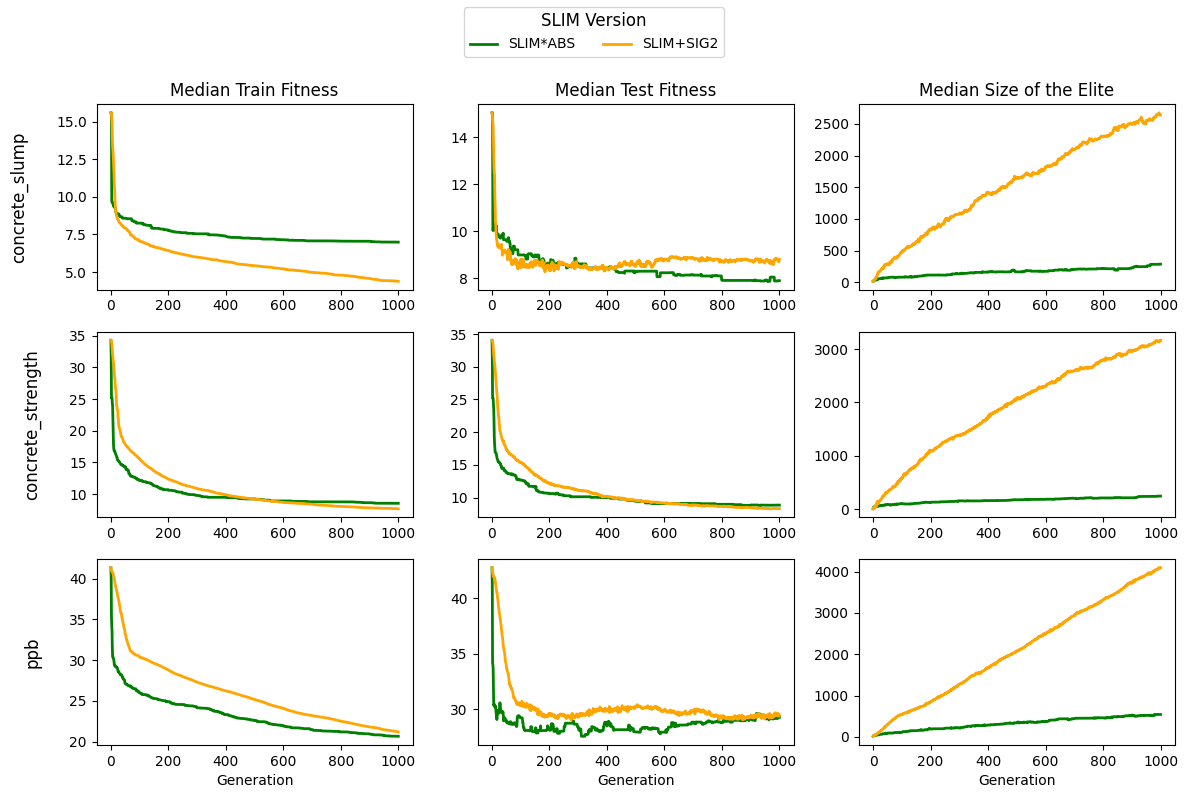

In [8]:
plot_median_metrics_3datasets(["concrete_slump", "concrete_strength", "ppb"], "donor_xo", ['donor_xo/concrete_slump_donor_xo.csv', 'donor_xo/concrete_strength_donor_xo.csv', 'donor_xo/ppb_donor_xo.csv'],1)

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_xo/donor_xo_2.png


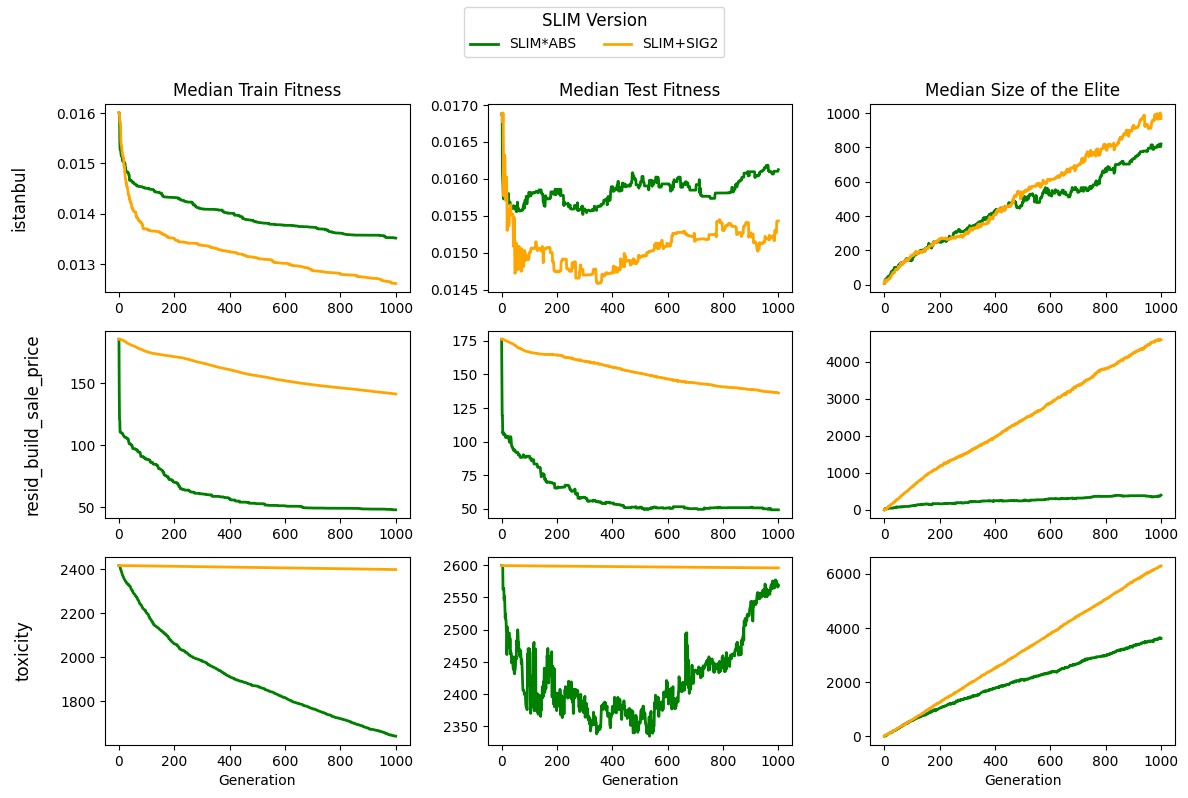

In [9]:
plot_median_metrics_3datasets(["istanbul", "resid_build_sale_price", "toxicity"], "donor_xo", ['donor_xo/istanbul_donor_xo.csv', 'donor_xo/resid_build_sale_price_donor_xo.csv', 'donor_xo/toxicity_donor_xo.csv'],2)

## Donor_n_xo

For each dataset, n = 1,5,25

#### Concrete Slump

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_concrete_slump.png


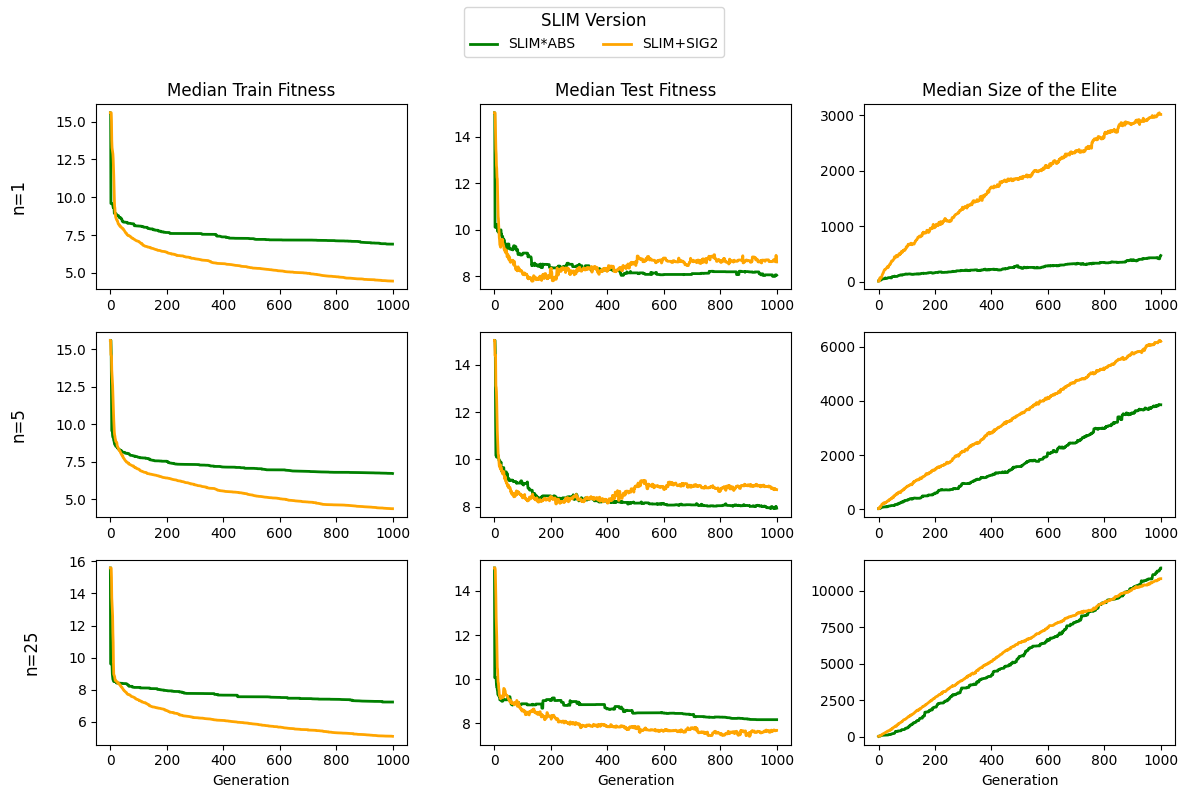

In [7]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['donor_n_xo/1_new_donor_n_xo/concrete_slump_1_new_donor_n_xo.csv', 'donor_n_xo/5_new_donor_n_xo/concrete_slump_5_new_donor_n_xo.csv', 'donor_n_xo/25_new_donor_n_xo/concrete_slump_25_new_donor_n_xo.csv'], "concrete_slump")

#### Concrete Strength

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_concrete_strength.png


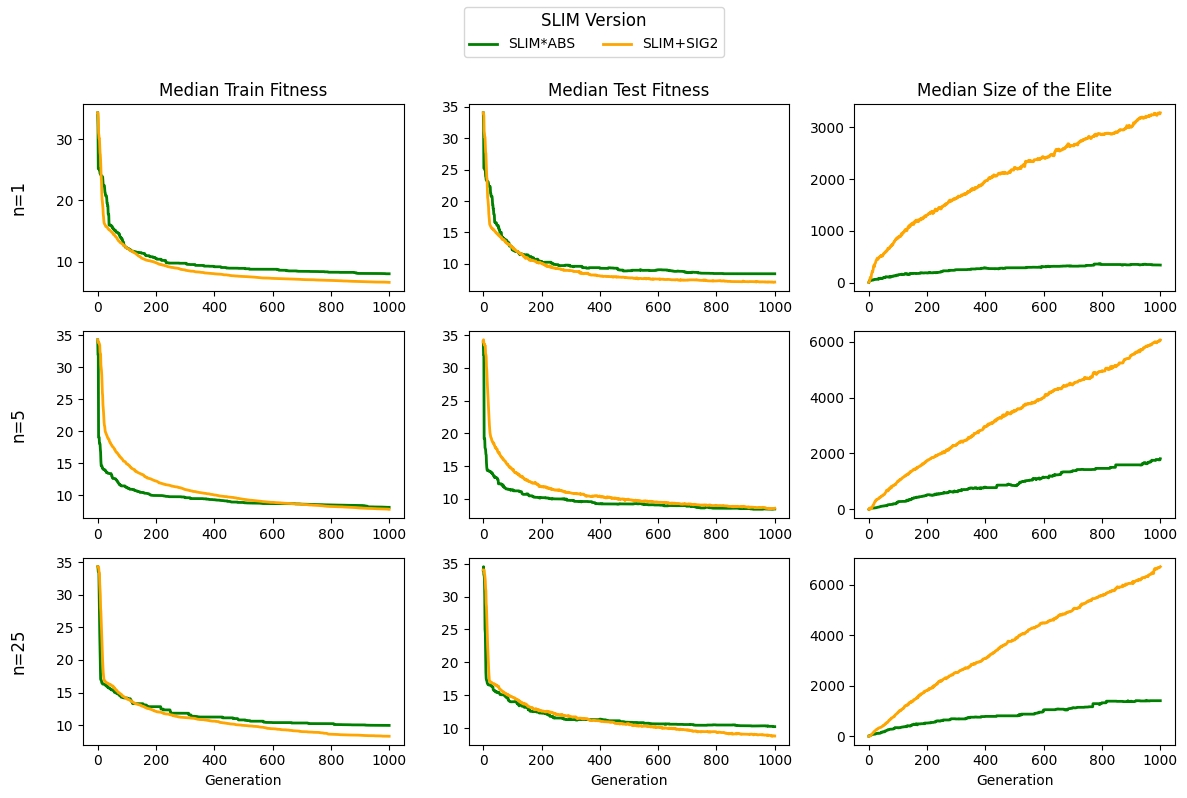

In [5]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['donor_n_xo/1_new_donor_n_xo/concrete_strength_1_new_donor_n_xo.csv', 'donor_n_xo/5_new_donor_n_xo/concrete_strength_5_new_donor_n_xo.csv', 'donor_n_xo/25_new_donor_n_xo/concrete_strength_25_new_donor_n_xo.csv'], "concrete_strength")

#### Istanbul

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_istanbul.png


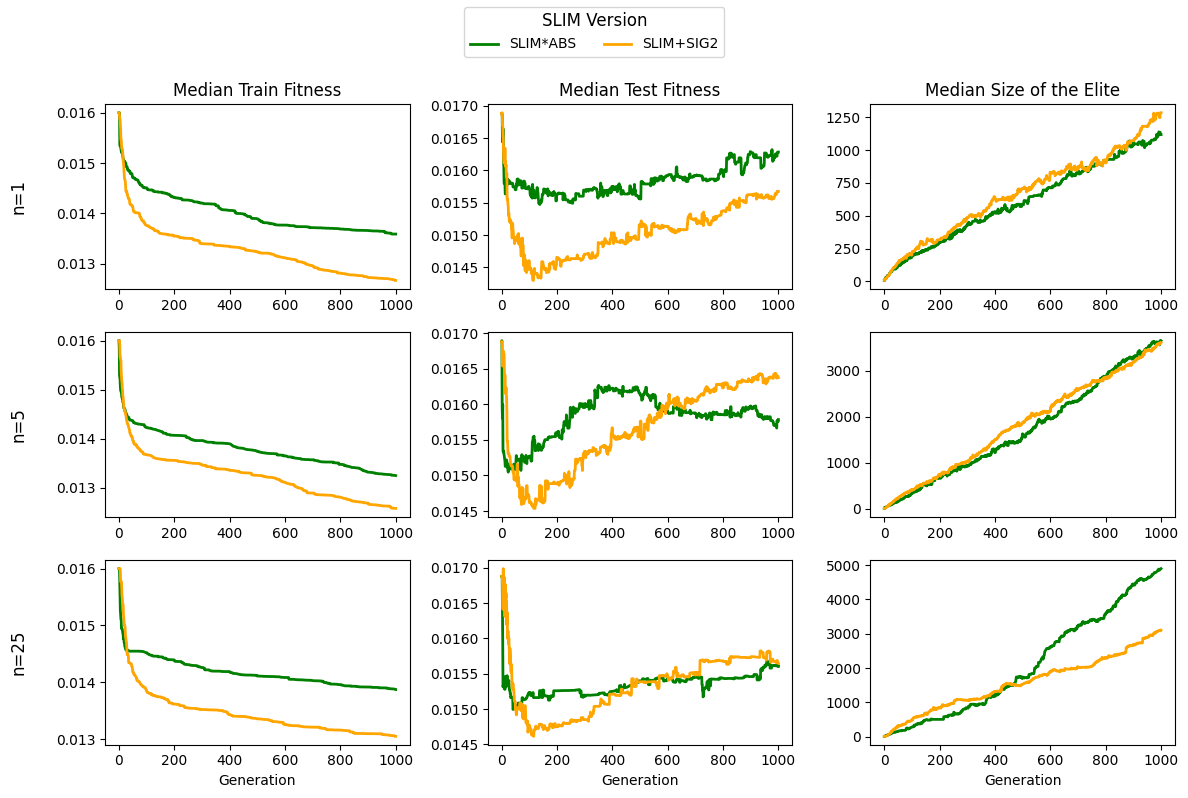

In [6]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['donor_n_xo/1_new_donor_n_xo/istanbul_1_new_donor_n_xo.csv', 'donor_n_xo/5_new_donor_n_xo/istanbul_5_new_donor_n_xo.csv', 'donor_n_xo/25_new_donor_n_xo/istanbul_25_new_donor_n_xo.csv'], "istanbul")

#### PPB

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_ppb.png


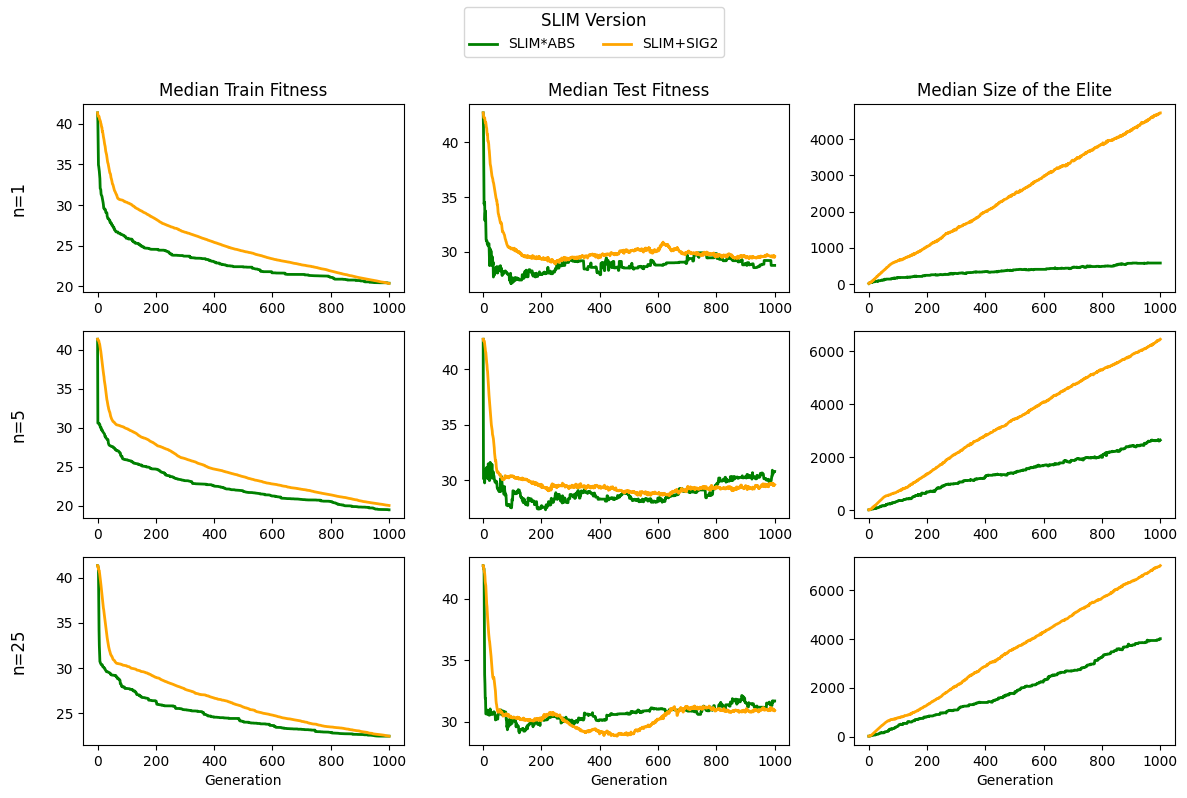

In [7]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['donor_n_xo/1_new_donor_n_xo/ppb_1_new_donor_n_xo.csv', 'donor_n_xo/5_new_donor_n_xo/ppb_5_new_donor_n_xo.csv', 'donor_n_xo/25_new_donor_n_xo/ppb_25_new_donor_n_xo.csv'], "ppb")

#### Resid_Build_Sale_Price (RBSP)

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_resid_build_sale_price.png


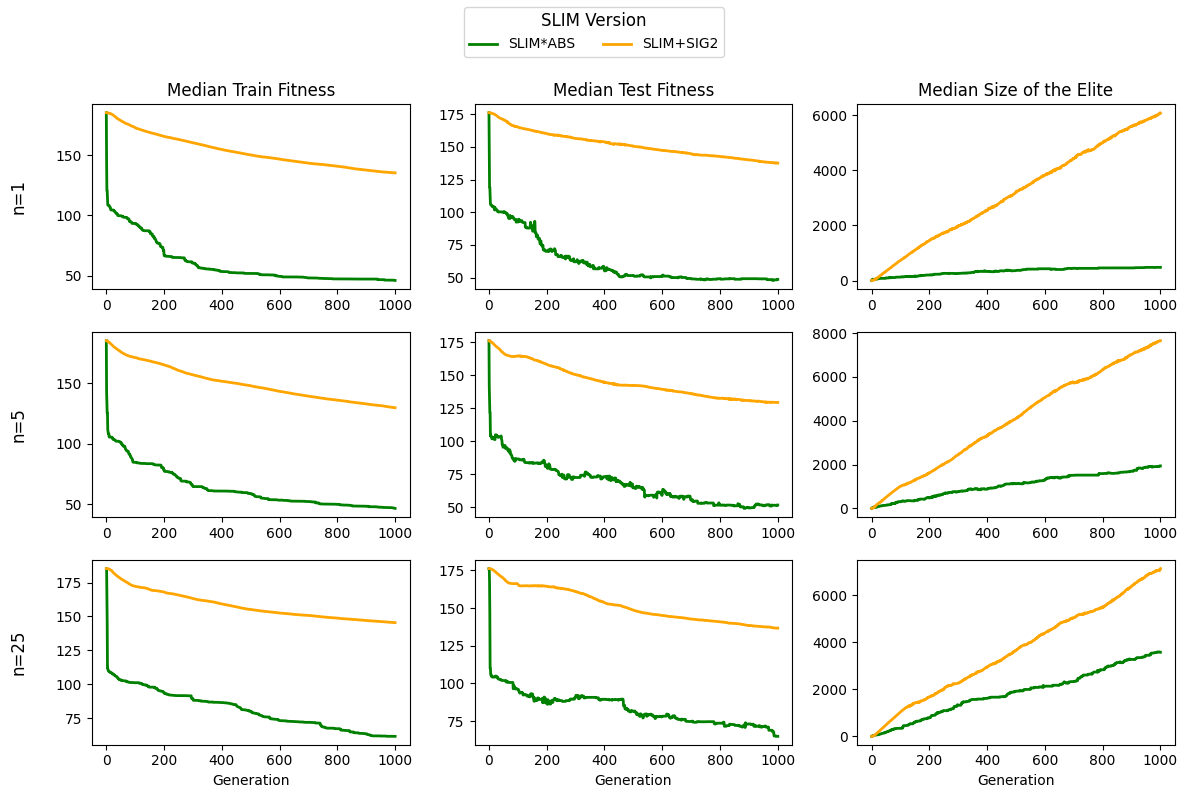

In [8]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['donor_n_xo/1_new_donor_n_xo/resid_build_sale_price_1_new_donor_n_xo.csv', 'donor_n_xo/5_new_donor_n_xo/resid_build_sale_price_5_new_donor_n_xo.csv', 'donor_n_xo/25_new_donor_n_xo/resid_build_sale_price_25_new_donor_n_xo.csv'], "resid_build_sale_price")

#### Toxicity

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/donor_n_xo/donor_n_xo_toxicity.png


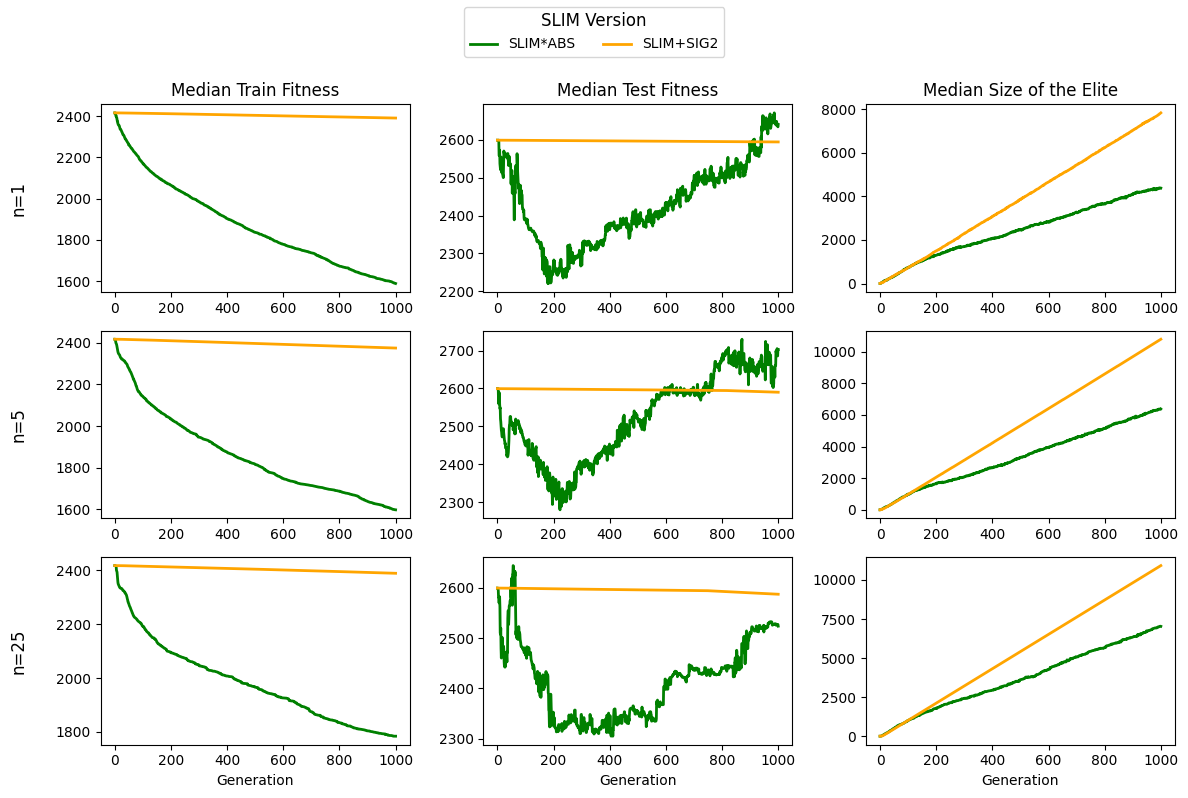

In [9]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "donor_n_xo", ['donor_n_xo/1_new_donor_n_xo/toxicity_1_new_donor_n_xo.csv', 'donor_n_xo/5_new_donor_n_xo/toxicity_5_new_donor_n_xo.csv', 'donor_n_xo/25_new_donor_n_xo/toxicity_25_new_donor_n_xo.csv'], "toxicity")

## Best_donor_xo

#### Concrete Slump

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_xo/best_donor_xo_concrete_slump.png


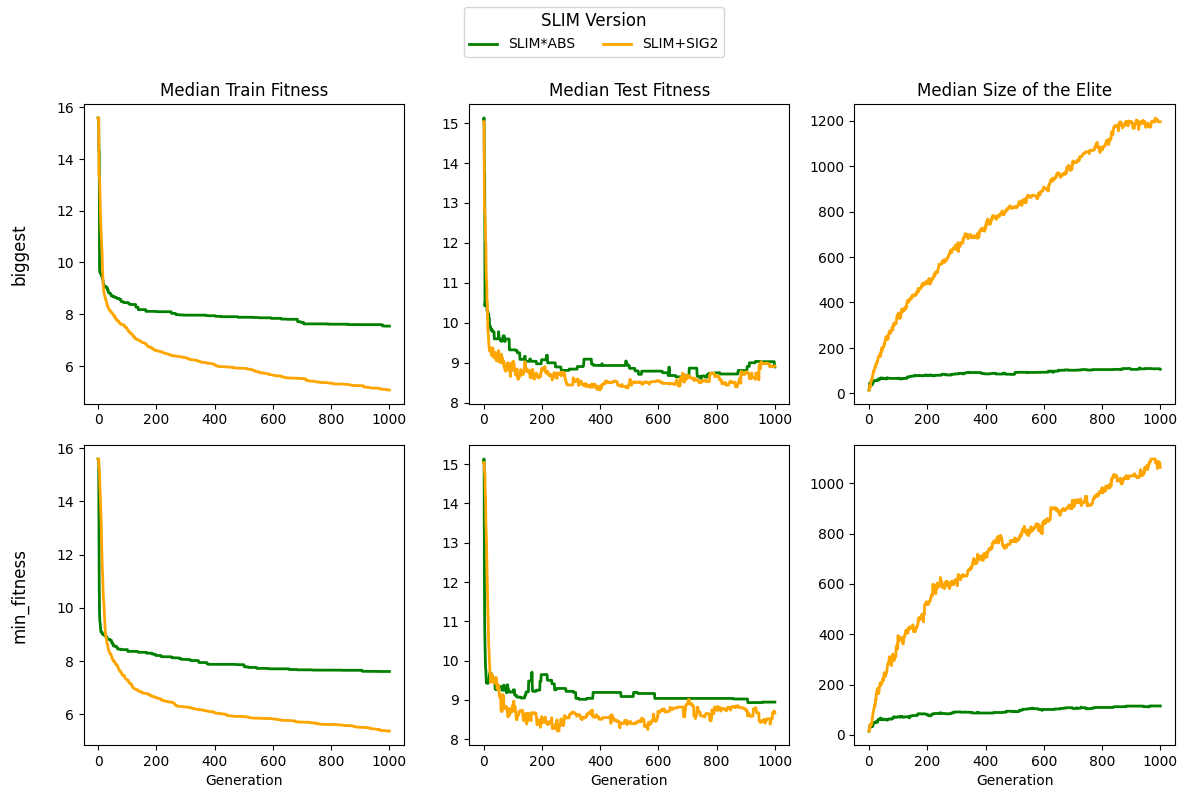

In [13]:
plot_median_metrics_3datasets(["biggest", "min_fitness"], "best_donor_xo", ['best_donor_xo/biggest_best_donor_xo/concrete_slump_biggest_best_donor_xo.csv', 'best_donor_xo/min_fitness_best_donor_xo/concrete_slump_min_fitness_best_donor_xo.csv'], "concrete_slump")

#### Concrete Strength

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_xo/best_donor_xo_concrete_strength.png


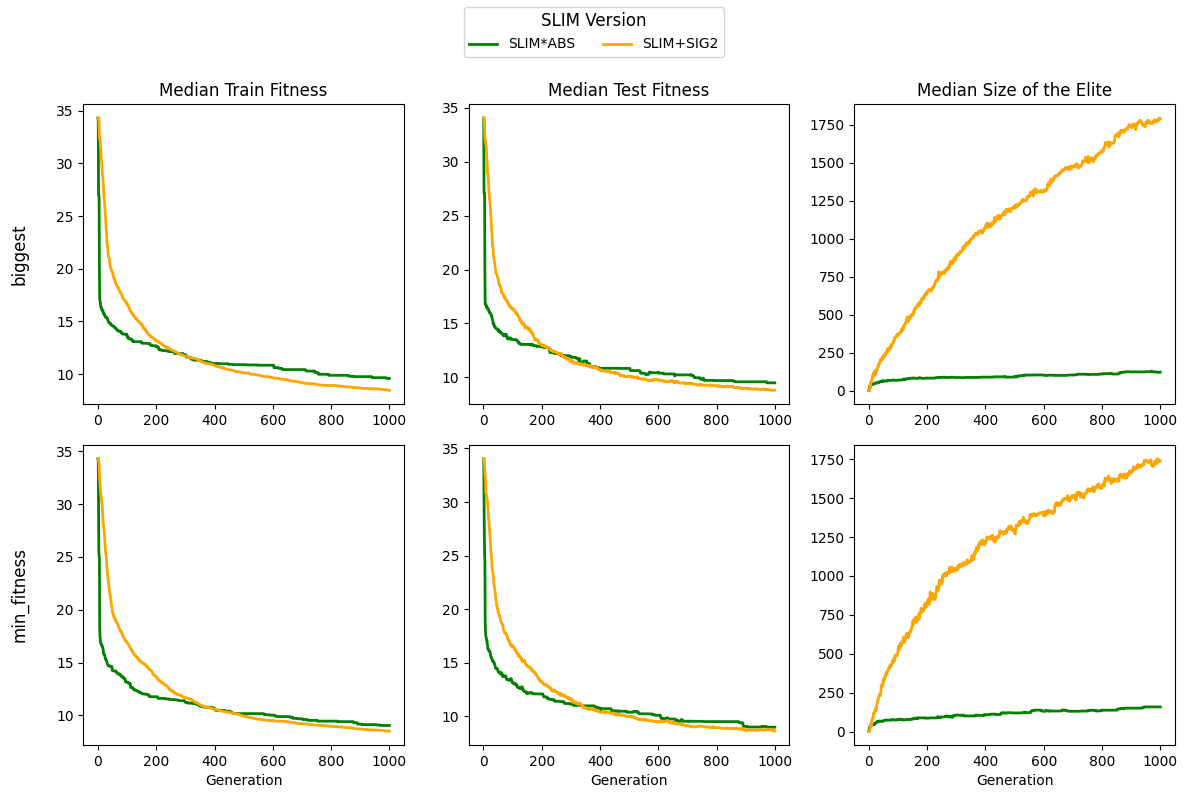

In [14]:
plot_median_metrics_3datasets(["biggest", "min_fitness"], "best_donor_xo", ['best_donor_xo/biggest_best_donor_xo/concrete_strength_biggest_best_donor_xo.csv', 'best_donor_xo/min_fitness_best_donor_xo/concrete_strength_min_fitness_best_donor_xo.csv'], "concrete_strength")

#### Istanbul

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_xo/best_donor_xo_istanbul.png


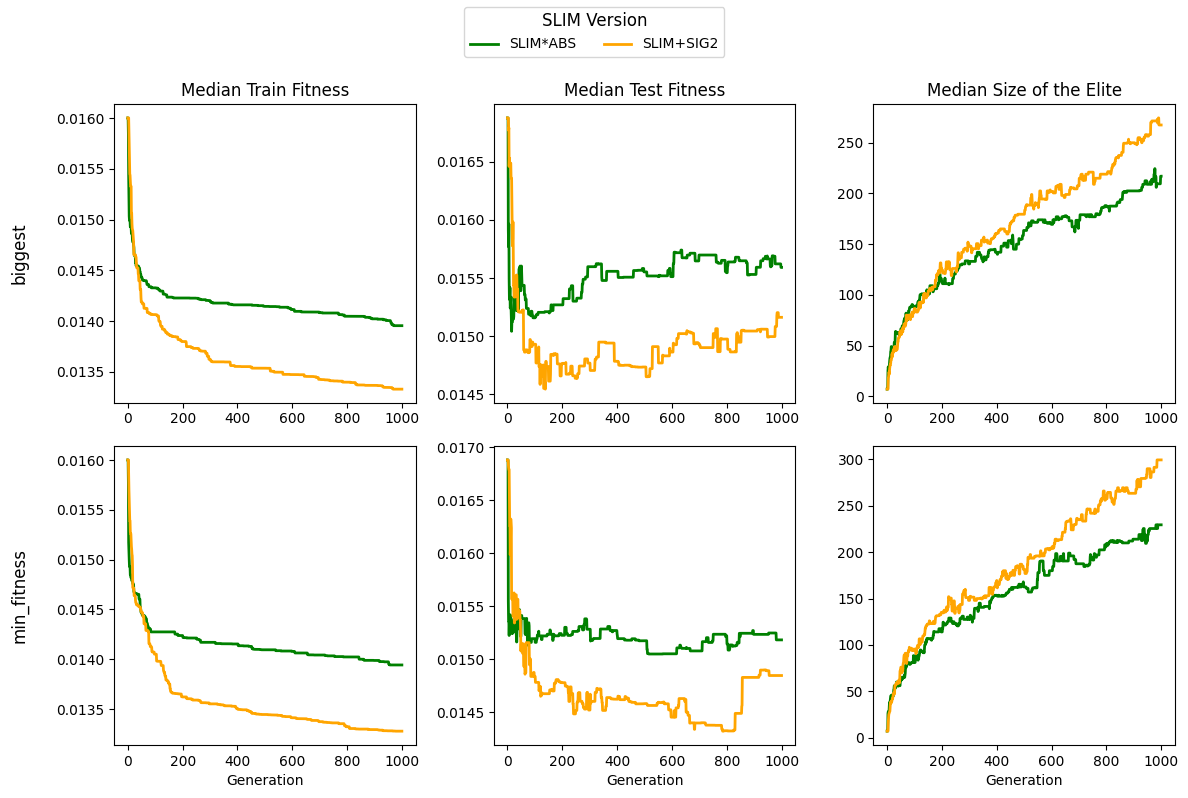

In [15]:
plot_median_metrics_3datasets(["biggest", "min_fitness"], "best_donor_xo", ['best_donor_xo/biggest_best_donor_xo/istanbul_biggest_best_donor_xo.csv', 'best_donor_xo/min_fitness_best_donor_xo/istanbul_min_fitness_best_donor_xo.csv'], "istanbul")

#### PPB

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_xo/best_donor_xo_ppb.png


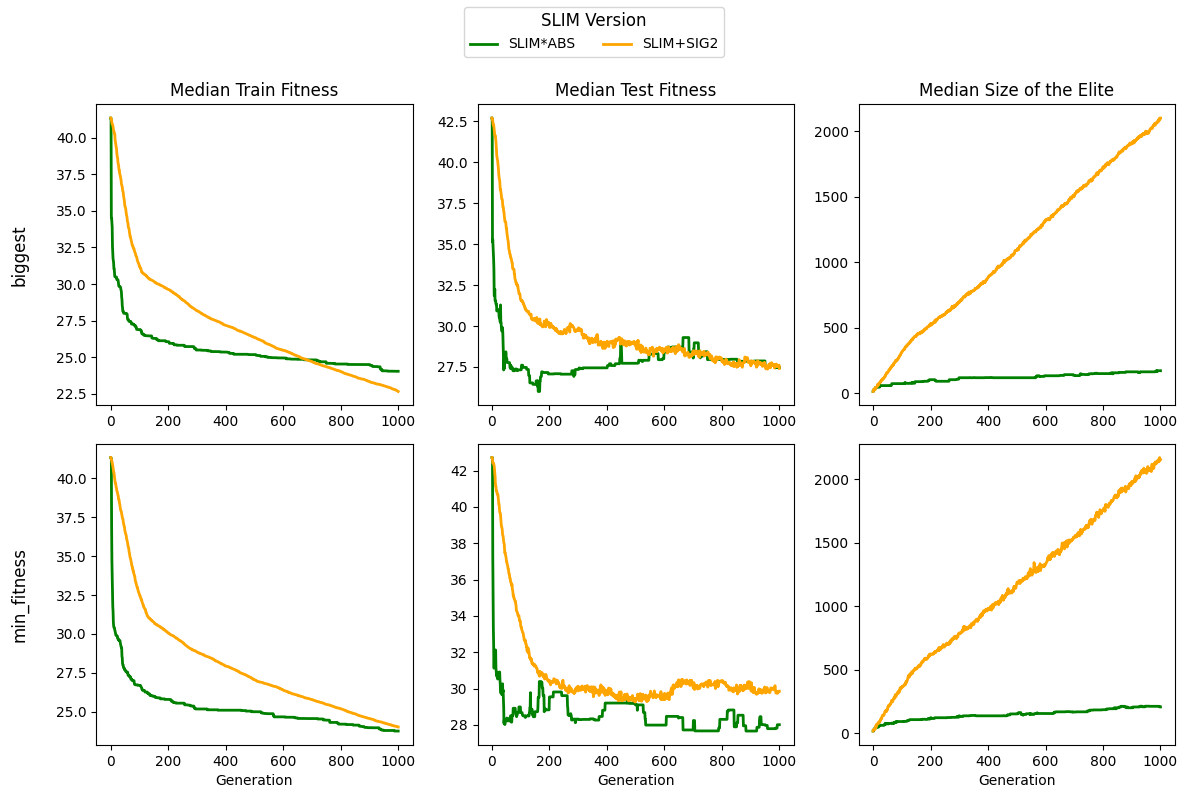

In [16]:
plot_median_metrics_3datasets(["biggest", "min_fitness"], "best_donor_xo", ['best_donor_xo/biggest_best_donor_xo/ppb_biggest_best_donor_xo.csv', 'best_donor_xo/min_fitness_best_donor_xo/ppb_min_fitness_best_donor_xo.csv'], "ppb")

#### Resid_Build_Sale_Price (RBSP)

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_xo/best_donor_xo_resid_build_sale_price.png


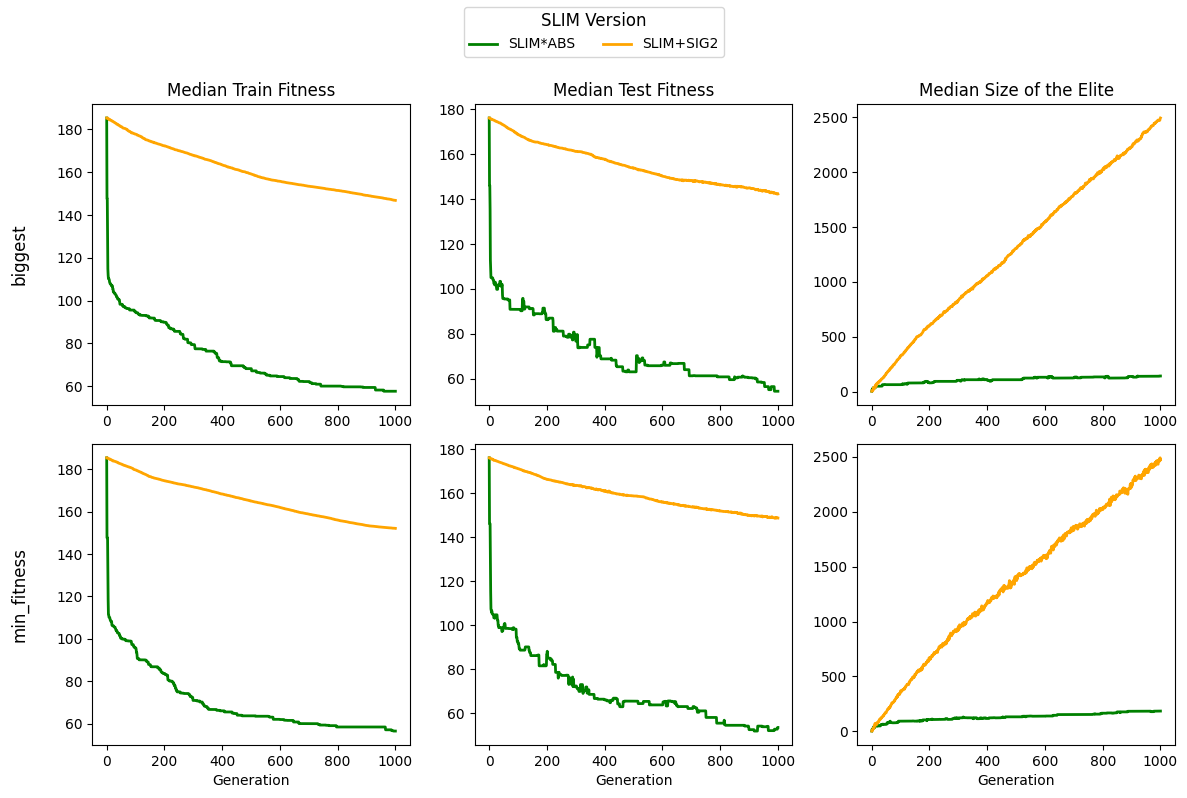

In [17]:
plot_median_metrics_3datasets(["biggest", "min_fitness"], "best_donor_xo", ['best_donor_xo/biggest_best_donor_xo/resid_build_sale_price_biggest_best_donor_xo.csv', 'best_donor_xo/min_fitness_best_donor_xo/resid_build_sale_price_min_fitness_best_donor_xo.csv'], "resid_build_sale_price")

#### Toxicity

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_xo/best_donor_xo_toxicity.png


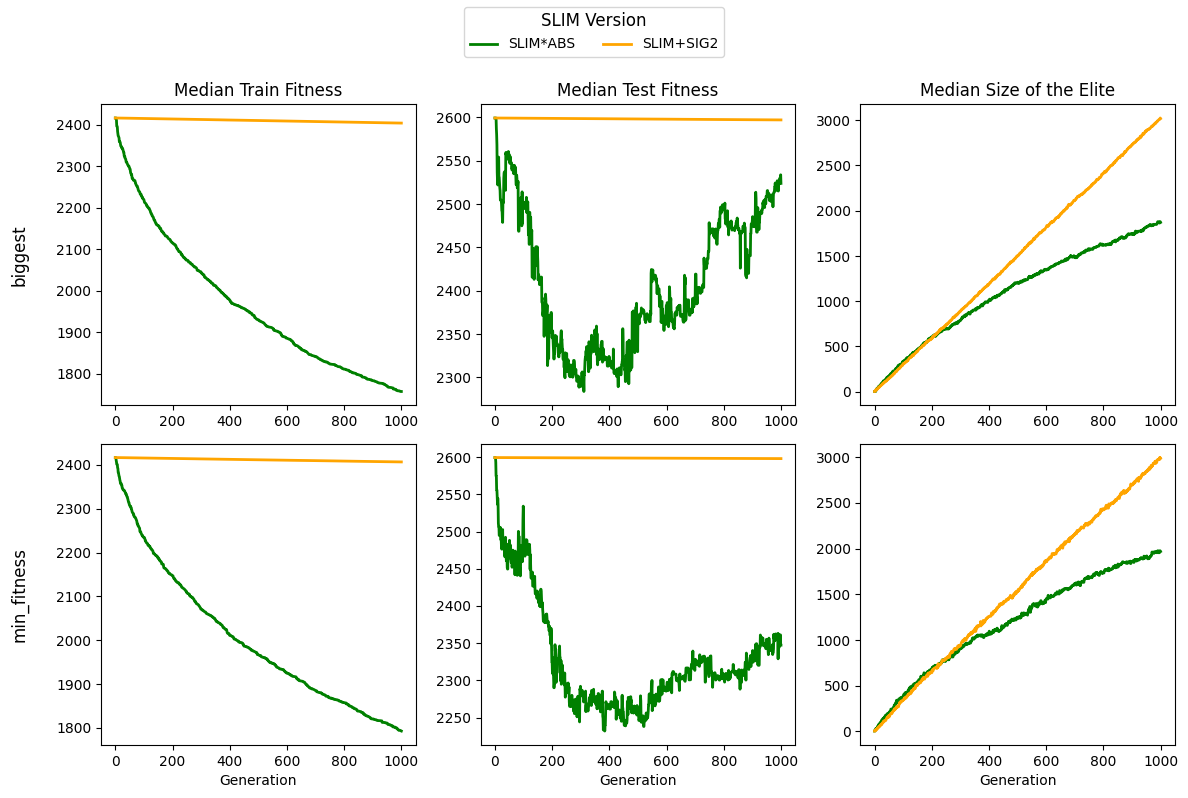

In [18]:
plot_median_metrics_3datasets(["biggest", "min_fitness"], "best_donor_xo", ['best_donor_xo/biggest_best_donor_xo/toxicity_biggest_best_donor_xo.csv', 'best_donor_xo/min_fitness_best_donor_xo/toxicity_min_fitness_best_donor_xo.csv'], "toxicity")

## Best_donor_n_xo

#### Concrete Slump

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_b_concrete_slump.png


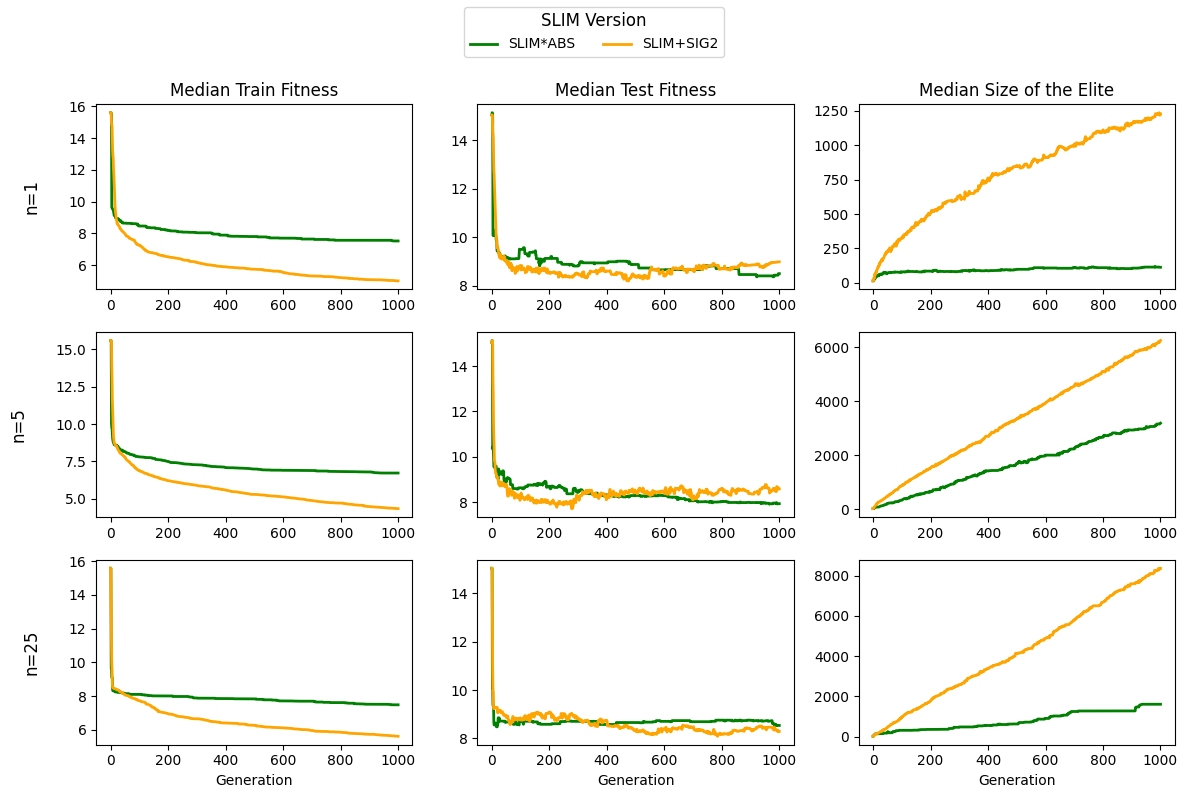

In [10]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/biggest/biggest_1_new_best_donor_n_xo/concrete_slump_biggest_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_5_new_best_donor_n_xo/concrete_slump_biggest_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_25_new_best_donor_n_xo/concrete_slump_biggest_25_new_best_donor_n_xo.csv'], "b_concrete_slump")

**min_fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_min_concrete_slump.png


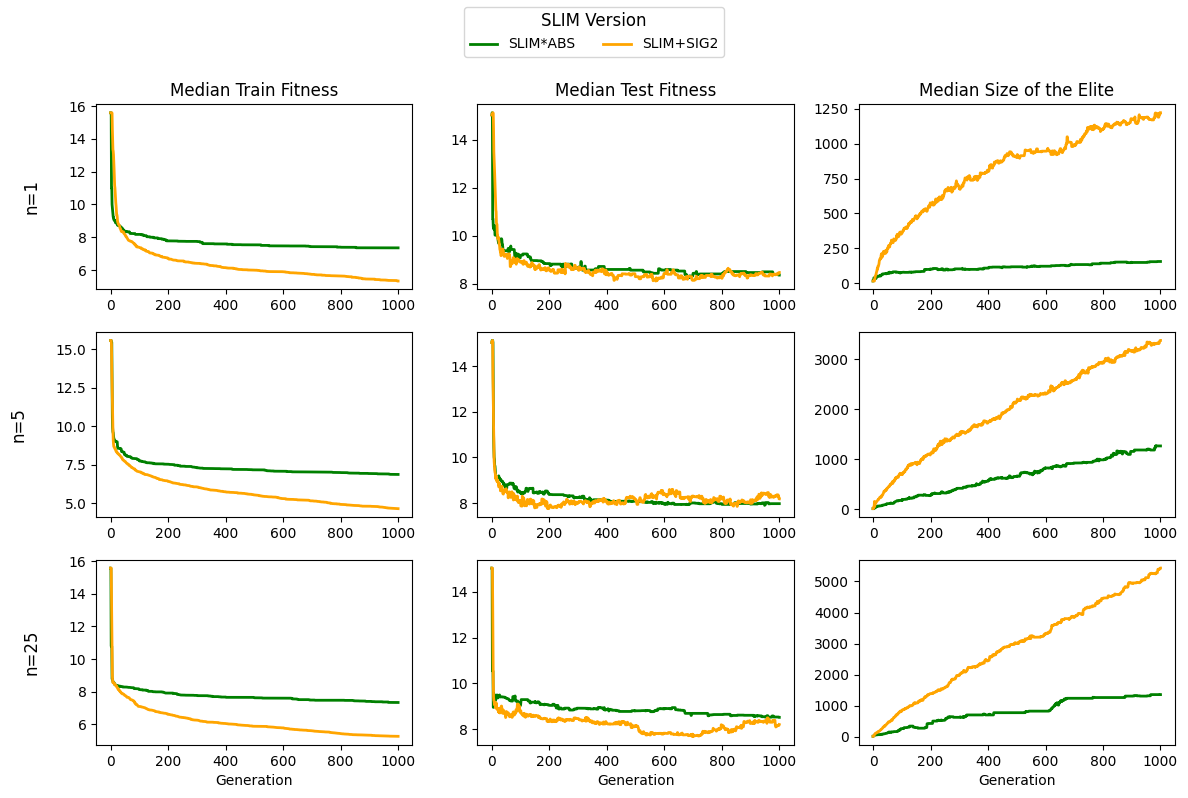

In [11]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/min_fitness/min_fitness_1_new_best_donor_n_xo/concrete_slump_min_fitness_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_5_new_best_donor_n_xo/concrete_slump_min_fitness_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_25_new_best_donor_n_xo/concrete_slump_min_fitness_25_new_best_donor_n_xo.csv'], "min_concrete_slump")

#### Concrete Strength

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_b_concrete_strength.png


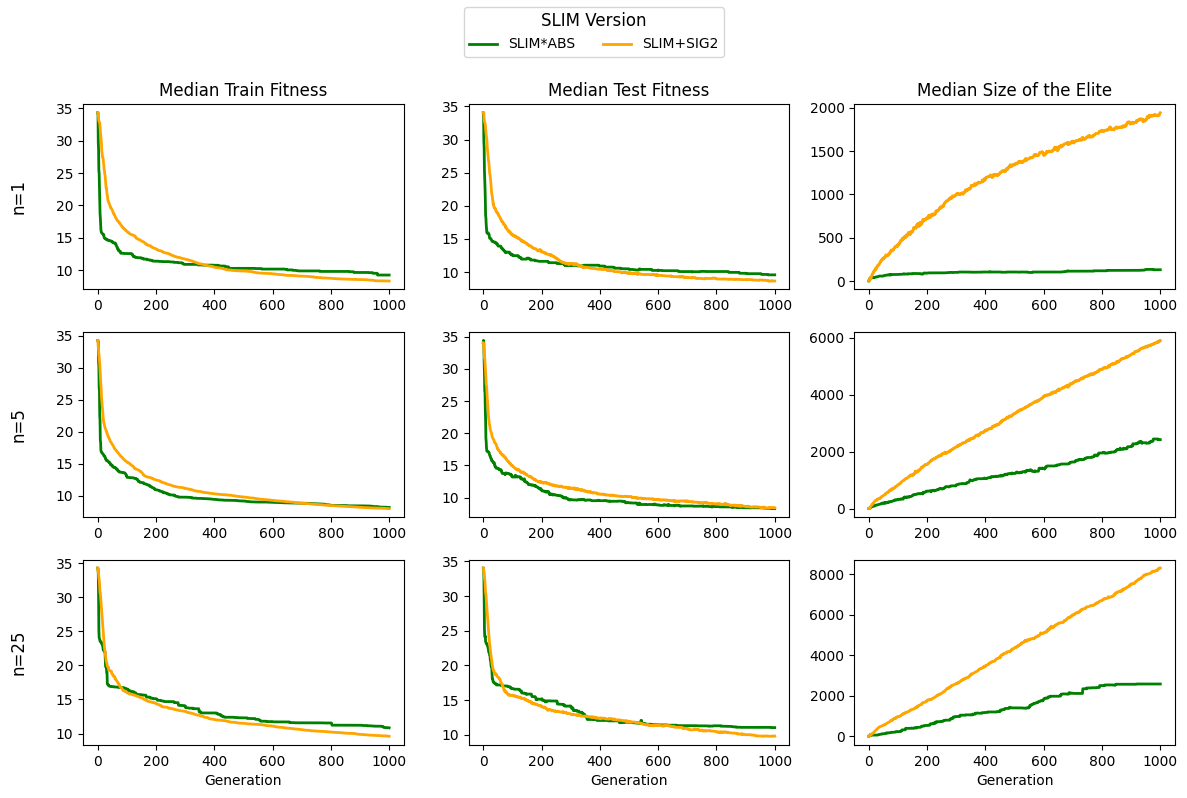

In [12]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/biggest/biggest_1_new_best_donor_n_xo/concrete_strength_biggest_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_5_new_best_donor_n_xo/concrete_strength_biggest_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_25_new_best_donor_n_xo/concrete_strength_biggest_25_new_best_donor_n_xo.csv'], "b_concrete_strength")

**min_fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_min_concrete_strength.png


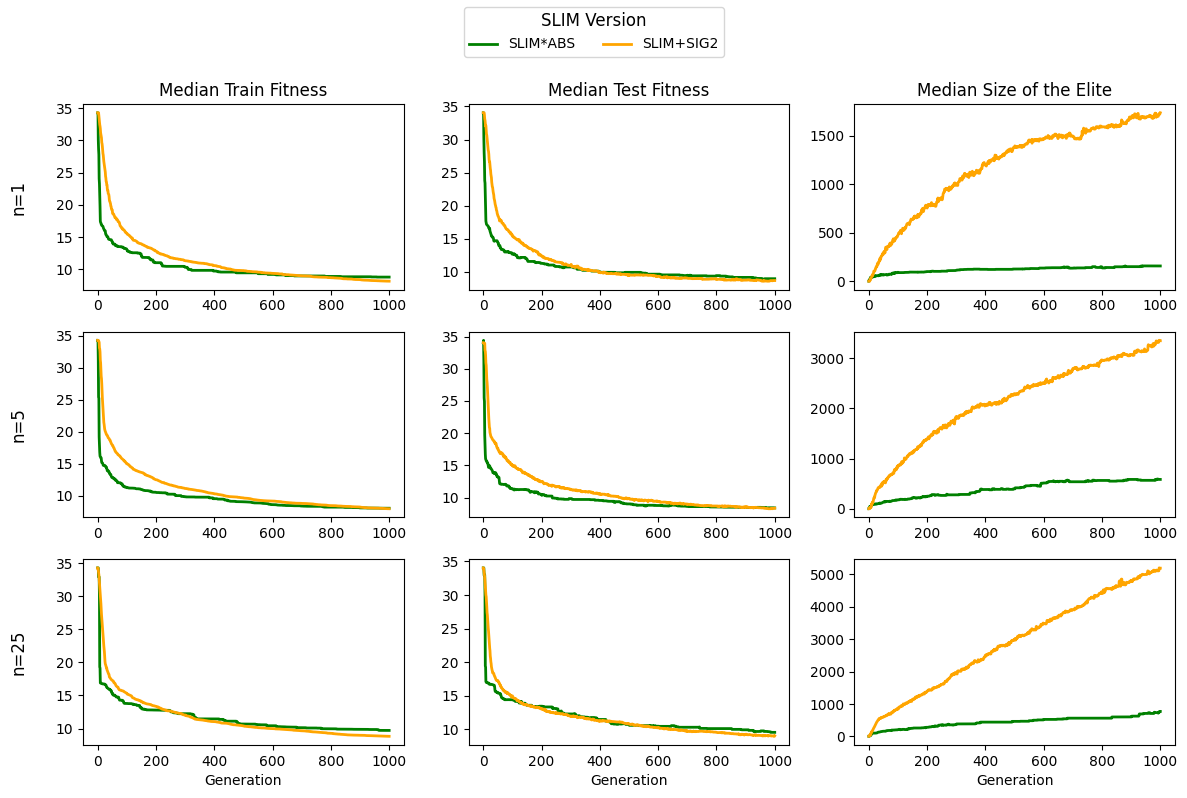

In [13]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/min_fitness/min_fitness_1_new_best_donor_n_xo/concrete_strength_min_fitness_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_5_new_best_donor_n_xo/concrete_strength_min_fitness_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_25_new_best_donor_n_xo/concrete_strength_min_fitness_25_new_best_donor_n_xo.csv'], "min_concrete_strength")

#### Istanbul

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_b_istanbul.png


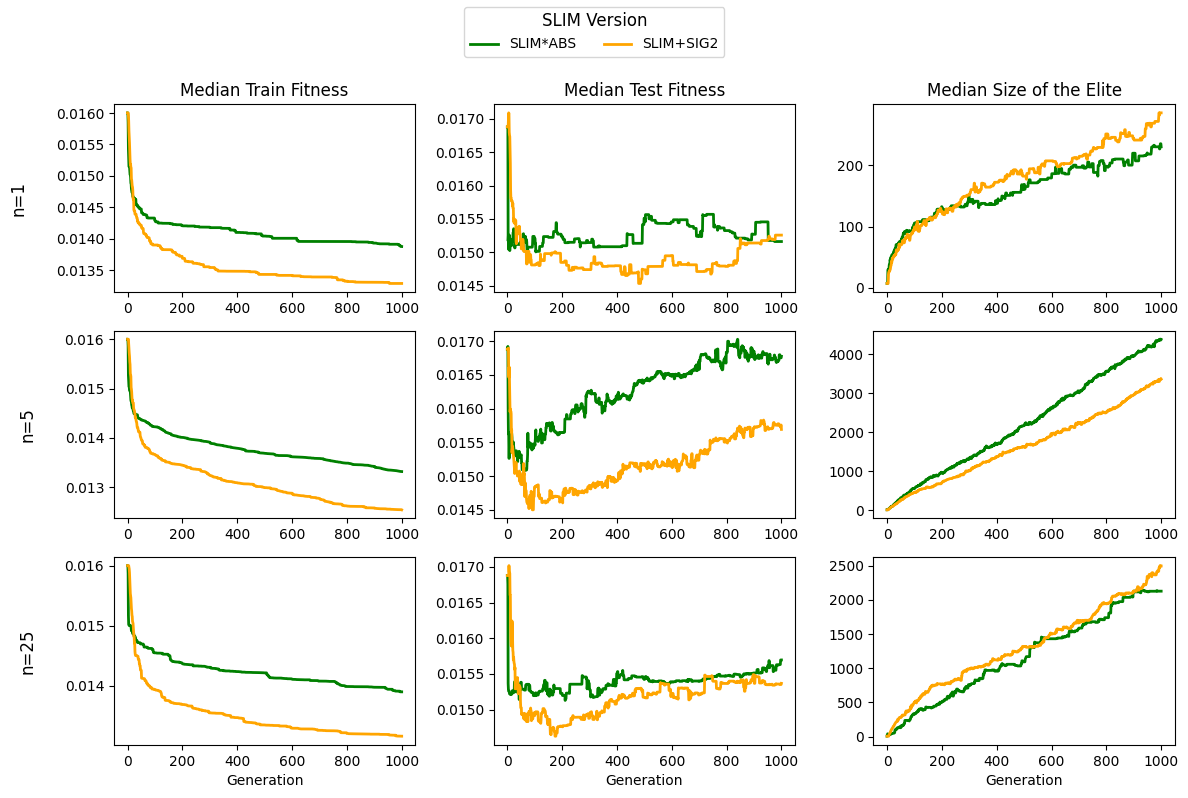

In [14]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/biggest/biggest_1_new_best_donor_n_xo/istanbul_biggest_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_5_new_best_donor_n_xo/istanbul_biggest_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_25_new_best_donor_n_xo/istanbul_biggest_25_new_best_donor_n_xo.csv'], "b_istanbul")

**min_fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_min_istanbul.png


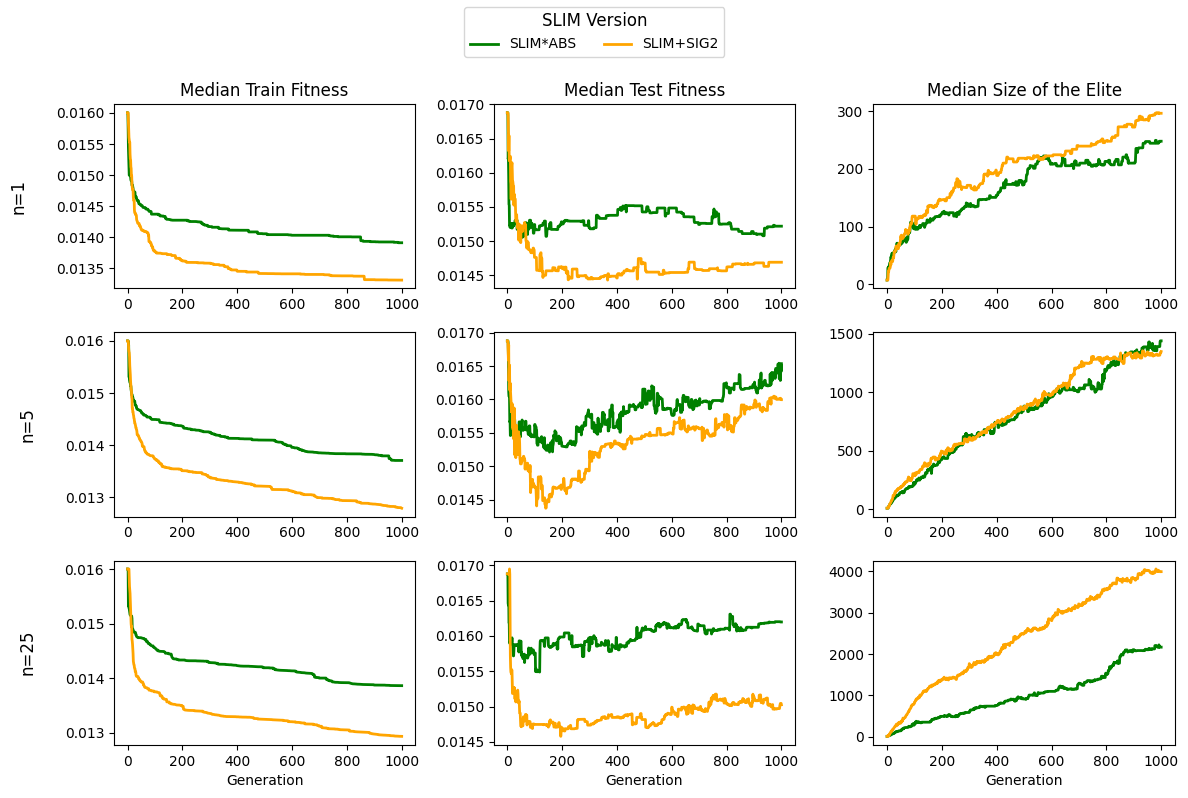

In [15]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/min_fitness/min_fitness_1_new_best_donor_n_xo/istanbul_min_fitness_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_5_new_best_donor_n_xo/istanbul_min_fitness_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_25_new_best_donor_n_xo/istanbul_min_fitness_25_new_best_donor_n_xo.csv'], "min_istanbul")

#### PPB

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_b_ppb.png


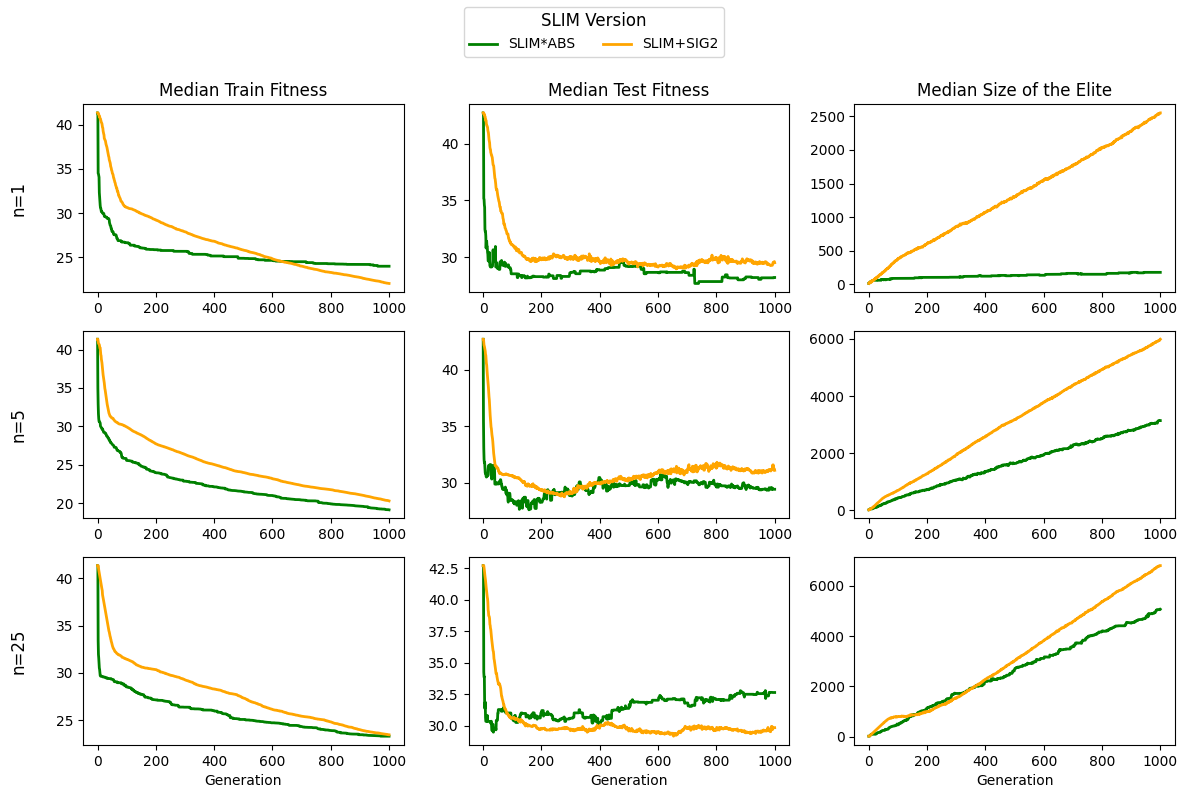

In [16]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/biggest/biggest_1_new_best_donor_n_xo/ppb_biggest_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_5_new_best_donor_n_xo/ppb_biggest_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_25_new_best_donor_n_xo/ppb_biggest_25_new_best_donor_n_xo.csv'], "b_ppb")

**min_fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_min_ppb.png


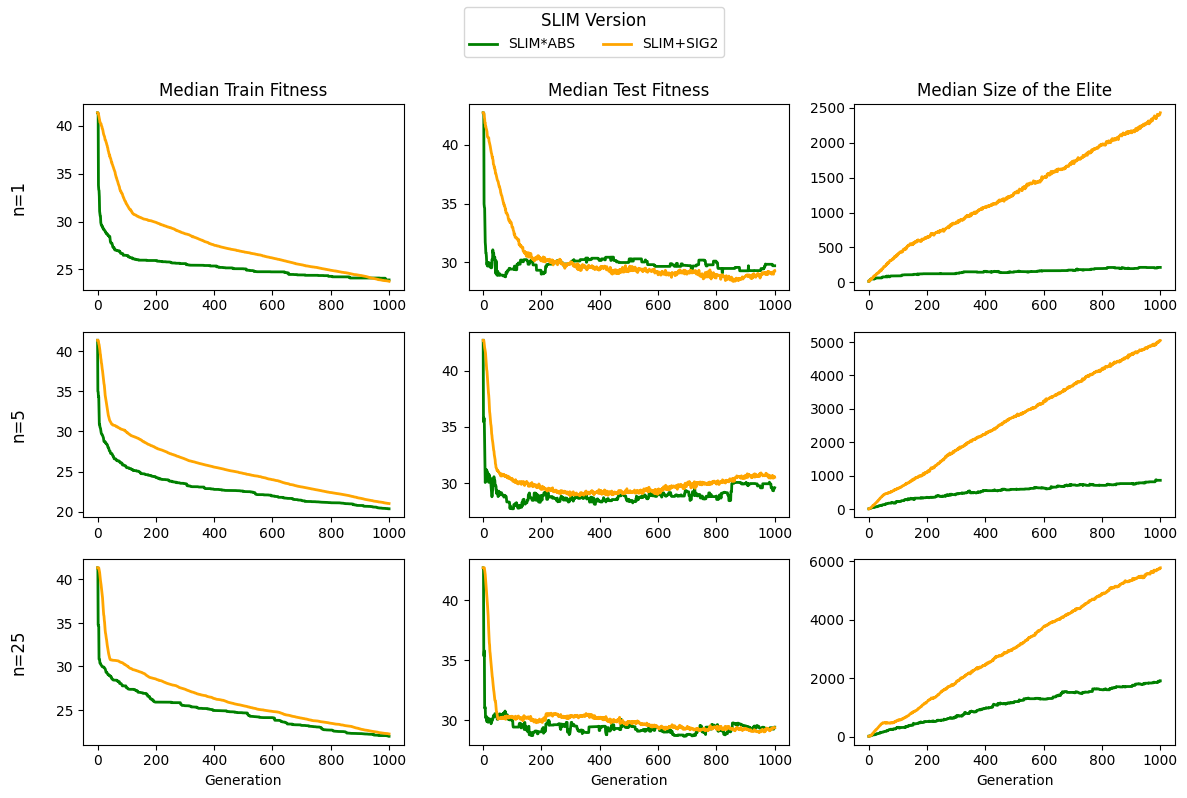

In [17]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/min_fitness/min_fitness_1_new_best_donor_n_xo/ppb_min_fitness_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_5_new_best_donor_n_xo/ppb_min_fitness_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_25_new_best_donor_n_xo/ppb_min_fitness_25_new_best_donor_n_xo.csv'], "min_ppb")

#### Resid_Build_Sale_Price (RBSP)

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_b_resid_build_sale_price.png


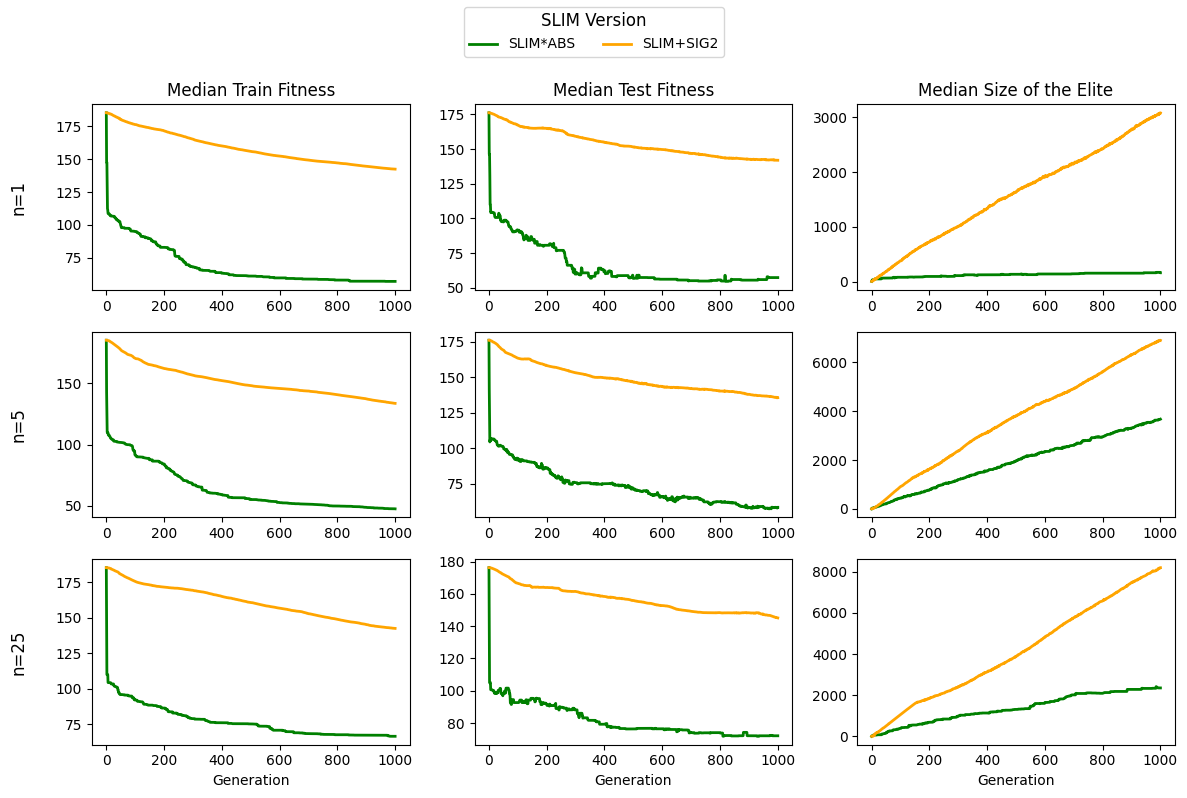

In [18]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/biggest/biggest_1_new_best_donor_n_xo/resid_build_sale_price_biggest_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_5_new_best_donor_n_xo/resid_build_sale_price_biggest_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_25_new_best_donor_n_xo/resid_build_sale_price_biggest_25_new_best_donor_n_xo.csv'], "b_resid_build_sale_price")

**min_fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_min_resid_build_sale_price.png


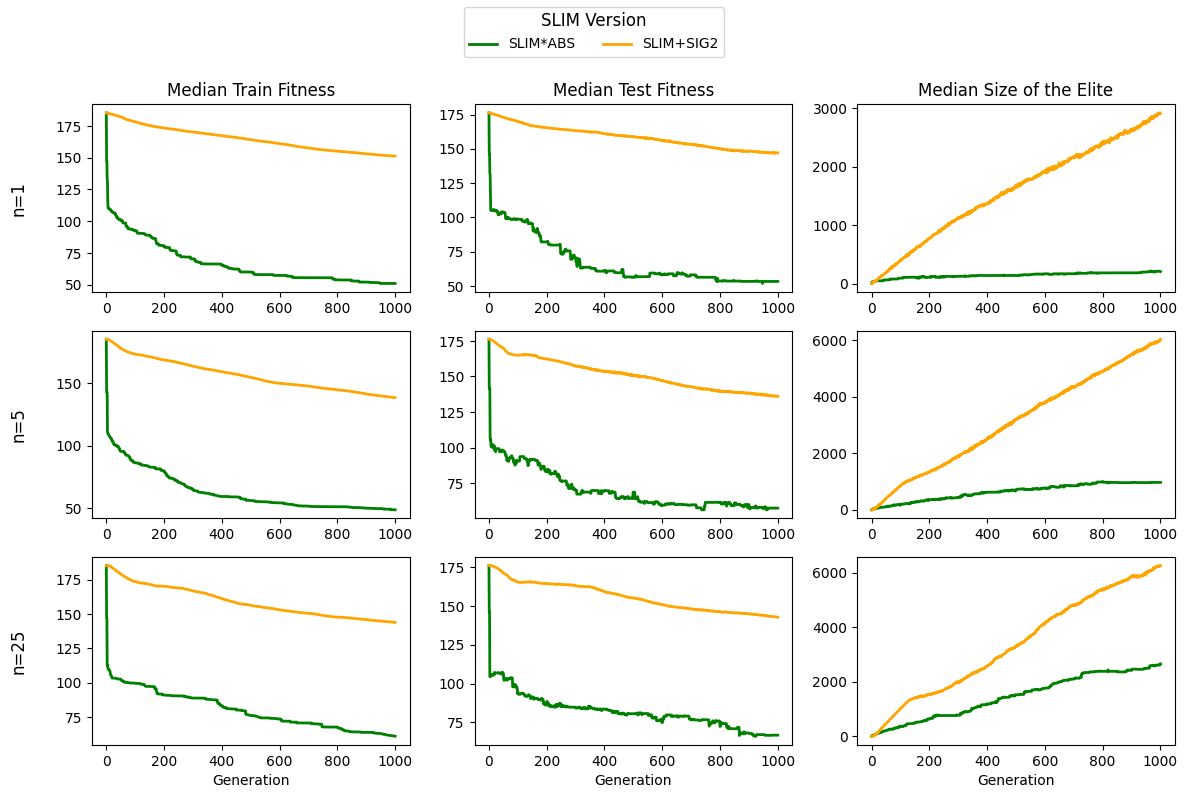

In [19]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/min_fitness/min_fitness_1_new_best_donor_n_xo/resid_build_sale_price_min_fitness_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_5_new_best_donor_n_xo/resid_build_sale_price_min_fitness_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_25_new_best_donor_n_xo/resid_build_sale_price_min_fitness_25_new_best_donor_n_xo.csv'], "min_resid_build_sale_price")

#### Toxicity

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_b_toxicity.png


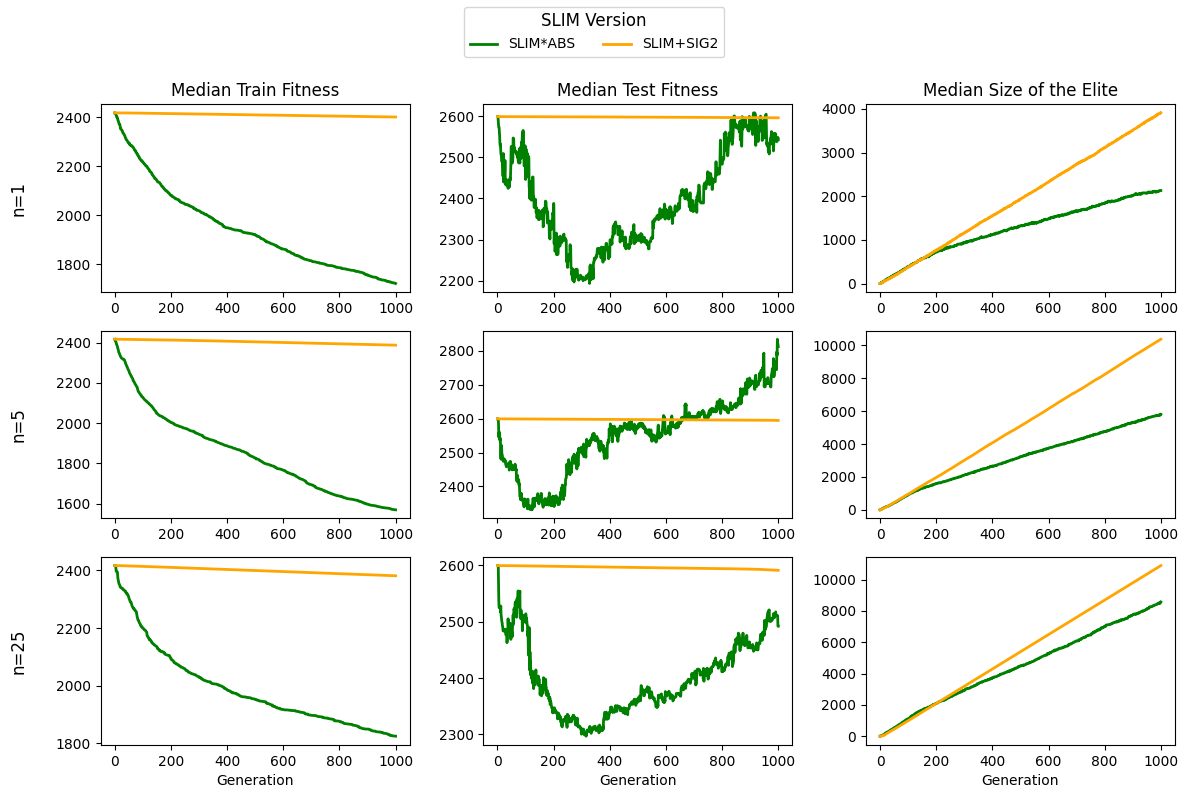

In [20]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/biggest/biggest_1_new_best_donor_n_xo/toxicity_biggest_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_5_new_best_donor_n_xo/toxicity_biggest_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/biggest/biggest_25_new_best_donor_n_xo/toxicity_biggest_25_new_best_donor_n_xo.csv'], "b_toxicity")

**min_fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/best_donor_n_xo/best_donor_n_xo_min_toxicity.png


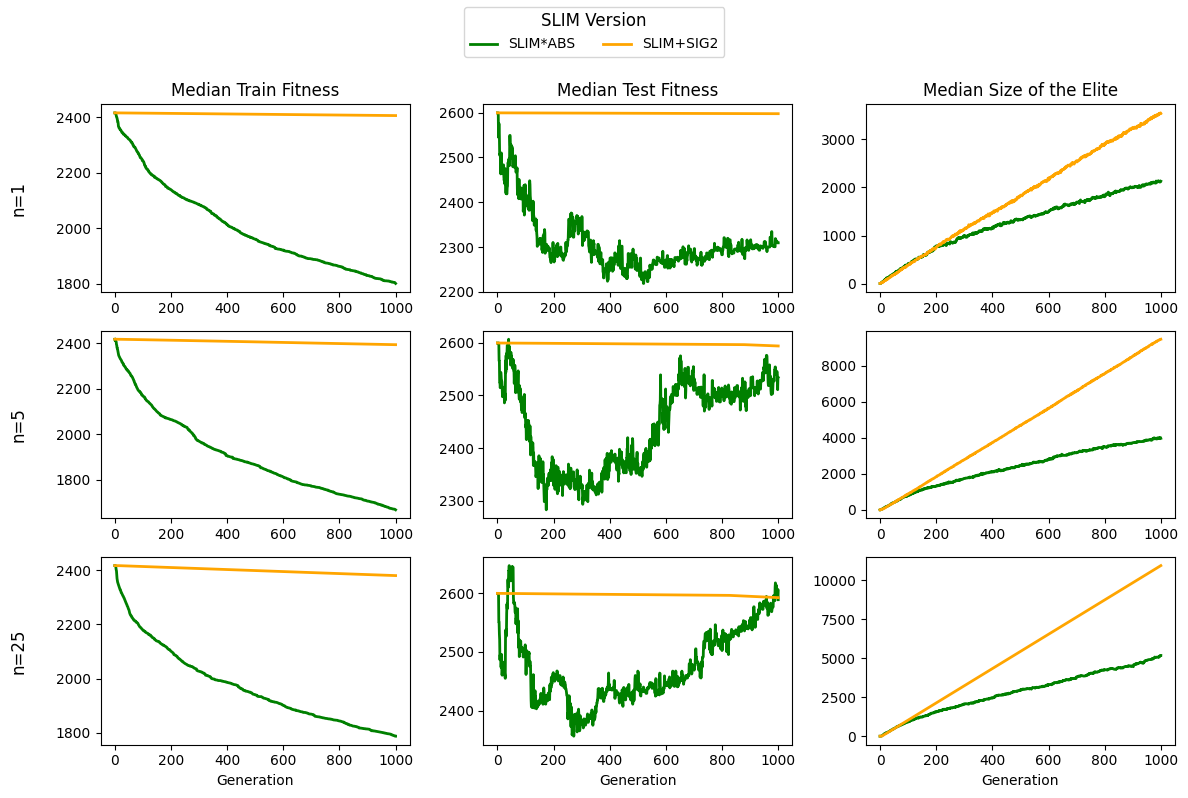

In [21]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "best_donor_n_xo", ['best_donor_n_xo/min_fitness/min_fitness_1_new_best_donor_n_xo/toxicity_min_fitness_1_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_5_new_best_donor_n_xo/toxicity_min_fitness_5_new_best_donor_n_xo.csv', 'best_donor_n_xo/min_fitness/min_fitness_25_new_best_donor_n_xo/toxicity_min_fitness_25_new_best_donor_n_xo.csv'], "min_toxicity")

## Dif_donor_n_xo

#### Concrete Slump

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_donor_n_xo/dif_donor_n_xo_concrete_slump.png


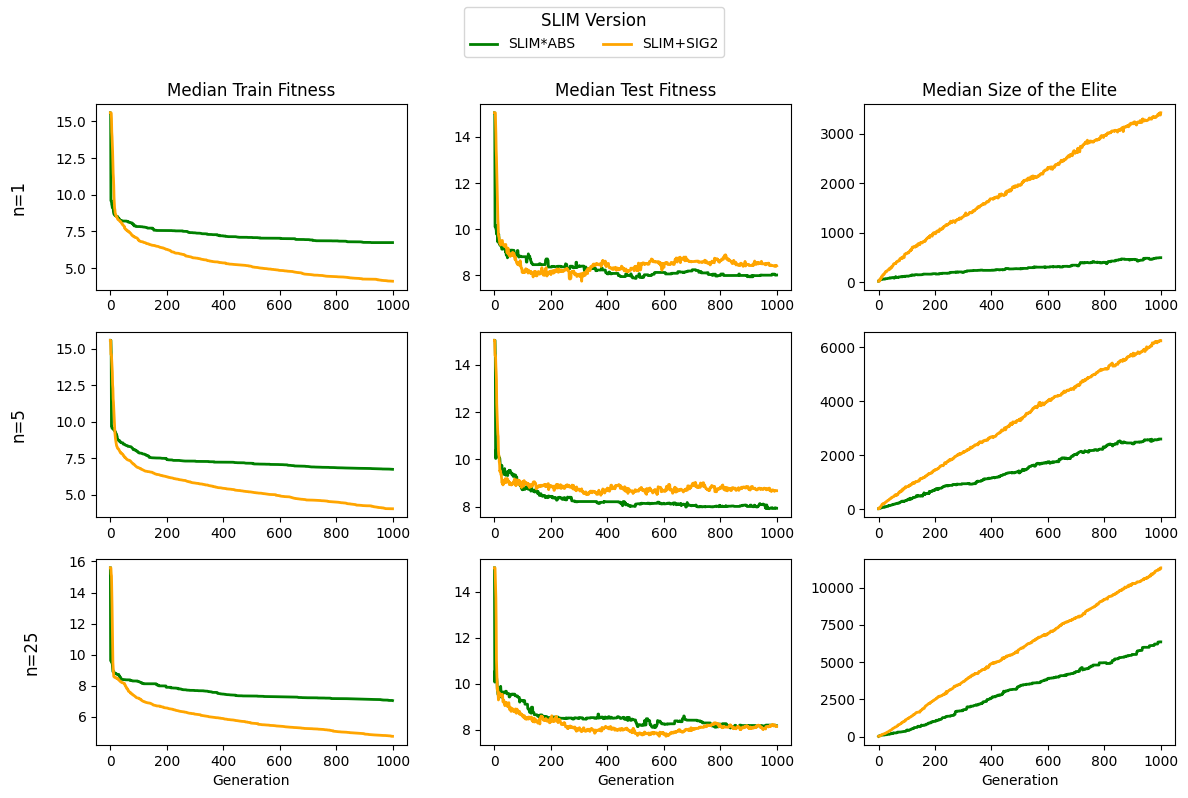

In [32]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_donor_n_xo", ['dif_donor_n_xo/1_dif_donor_n_xo/concrete_slump_1_dif_donor_n_xo.csv', 'dif_donor_n_xo/5_dif_donor_n_xo/concrete_slump_5_dif_donor_n_xo.csv', 'dif_donor_n_xo/25_dif_donor_n_xo/concrete_slump_25_dif_donor_n_xo.csv'], "concrete_slump")

#### Concrete Strength

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_donor_n_xo/dif_donor_n_xo_concrete_strength.png


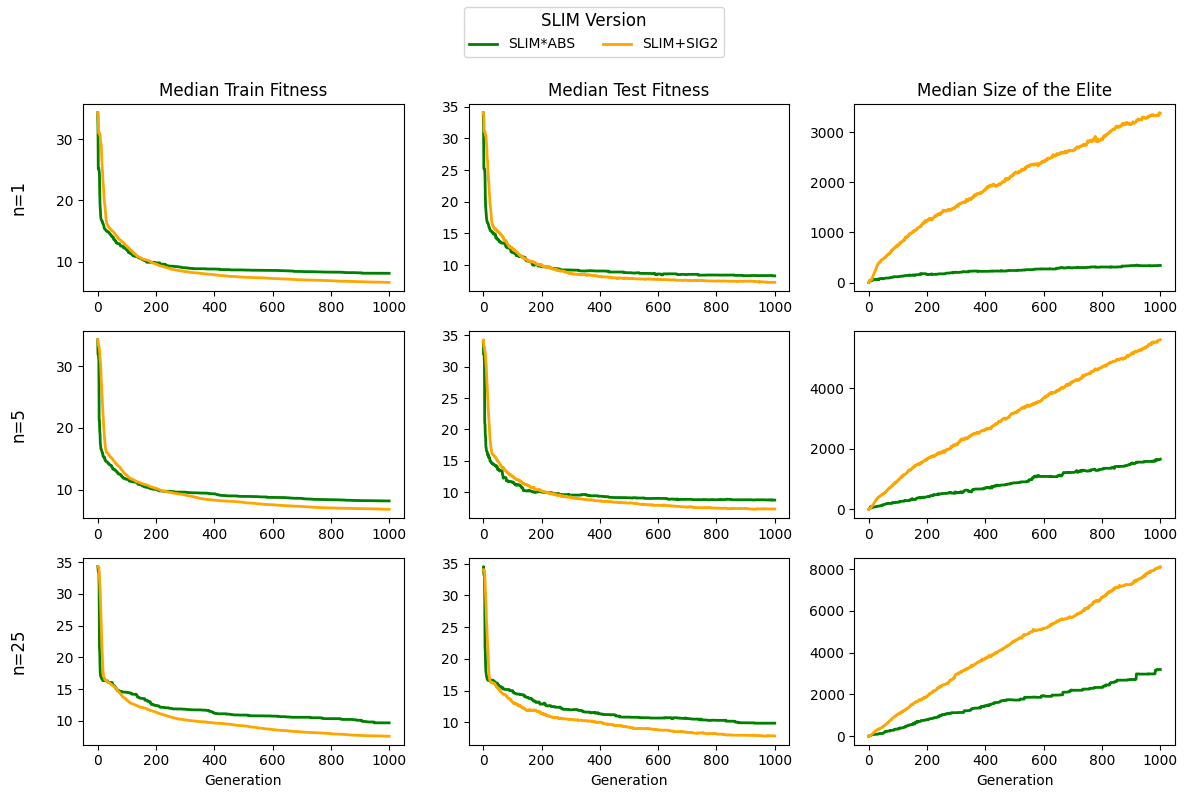

In [33]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_donor_n_xo", ['dif_donor_n_xo/1_dif_donor_n_xo/concrete_strength_1_dif_donor_n_xo.csv', 'dif_donor_n_xo/5_dif_donor_n_xo/concrete_strength_5_dif_donor_n_xo.csv', 'dif_donor_n_xo/25_dif_donor_n_xo/concrete_strength_25_dif_donor_n_xo.csv'], "concrete_strength")

#### Istanbul

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_donor_n_xo/dif_donor_n_xo_istanbul.png


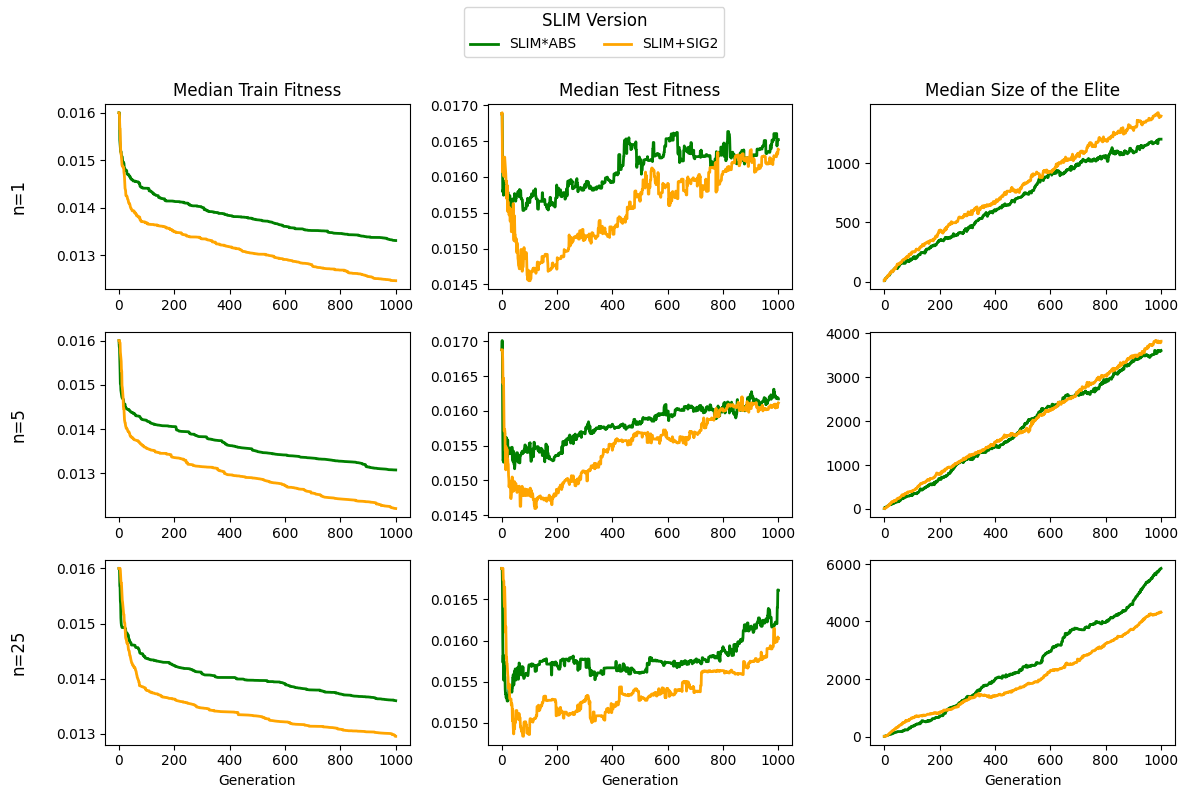

In [34]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_donor_n_xo", ['dif_donor_n_xo/1_dif_donor_n_xo/istanbul_1_dif_donor_n_xo.csv', 'dif_donor_n_xo/5_dif_donor_n_xo/istanbul_5_dif_donor_n_xo.csv', 'dif_donor_n_xo/25_dif_donor_n_xo/istanbul_25_dif_donor_n_xo.csv'], "istanbul")

#### PPB

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_donor_n_xo/dif_donor_n_xo_ppb.png


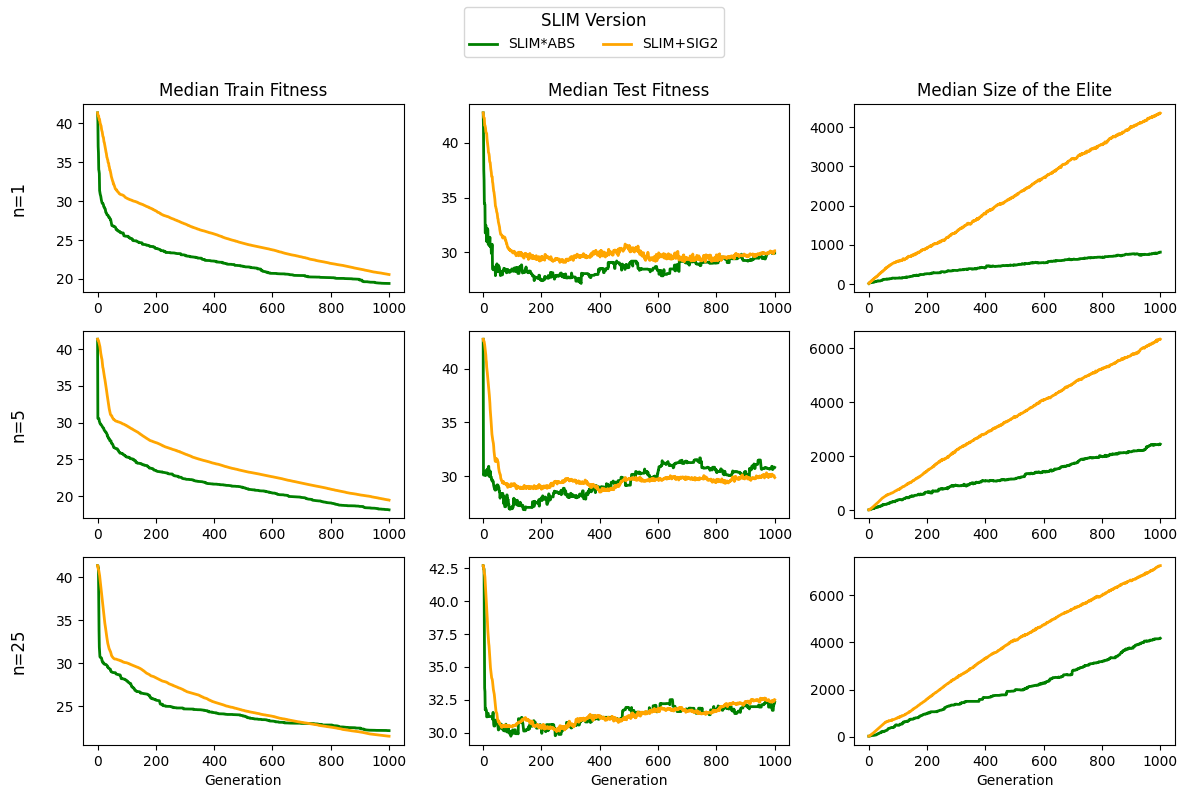

In [35]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_donor_n_xo", ['dif_donor_n_xo/1_dif_donor_n_xo/ppb_1_dif_donor_n_xo.csv', 'dif_donor_n_xo/5_dif_donor_n_xo/ppb_5_dif_donor_n_xo.csv', 'dif_donor_n_xo/25_dif_donor_n_xo/ppb_25_dif_donor_n_xo.csv'], "ppb")

#### Resid_Build_Sale_Price (RBSP)

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_donor_n_xo/dif_donor_n_xo_resid_build_sale_price.png


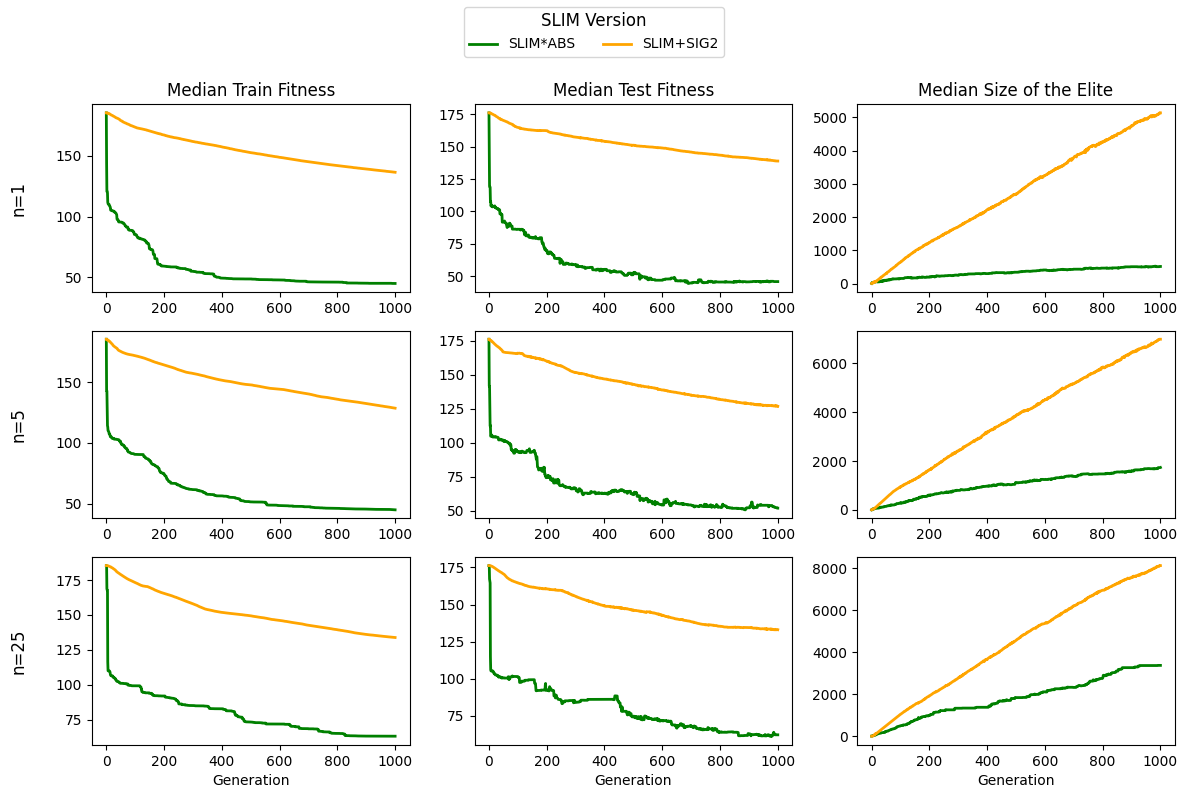

In [36]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_donor_n_xo", ['dif_donor_n_xo/1_dif_donor_n_xo/resid_build_sale_price_1_dif_donor_n_xo.csv', 'dif_donor_n_xo/5_dif_donor_n_xo/resid_build_sale_price_5_dif_donor_n_xo.csv', 'dif_donor_n_xo/25_dif_donor_n_xo/resid_build_sale_price_25_dif_donor_n_xo.csv'], "resid_build_sale_price")

#### Toxicity

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_donor_n_xo/dif_donor_n_xo_toxicity.png


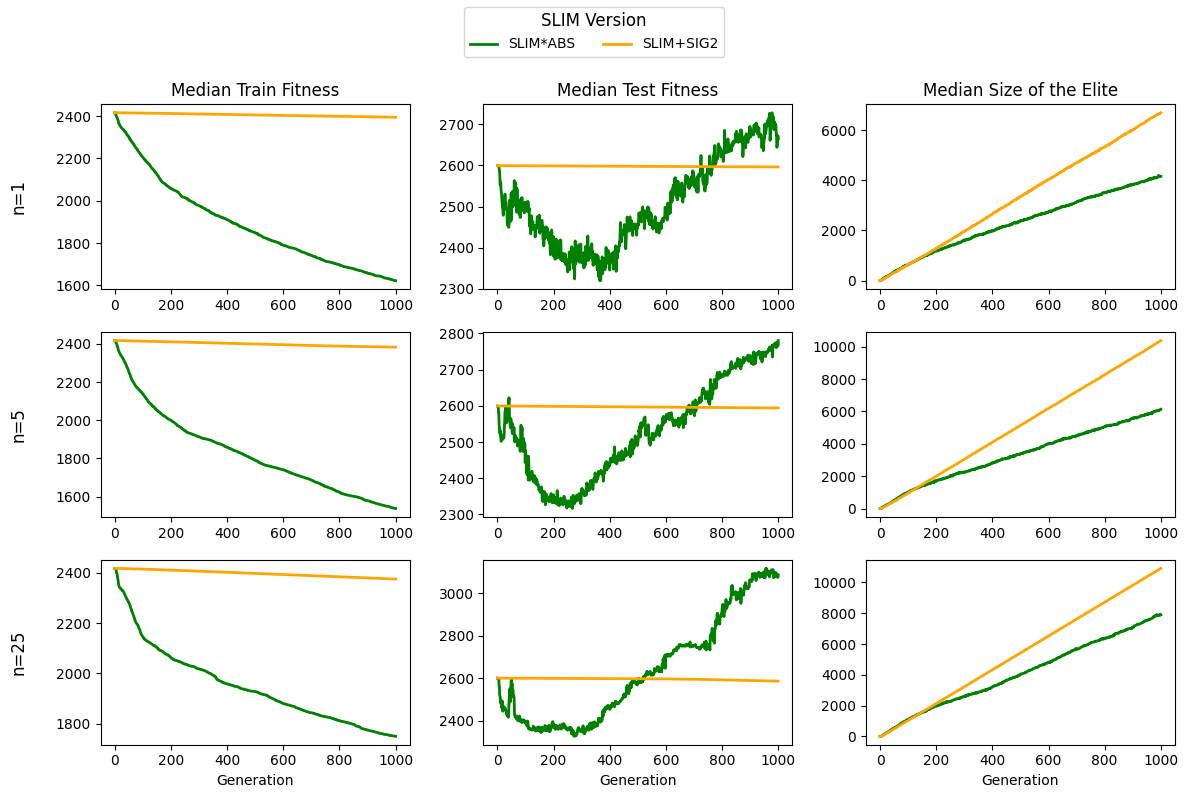

In [37]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_donor_n_xo", ['dif_donor_n_xo/1_dif_donor_n_xo/toxicity_1_dif_donor_n_xo.csv', 'dif_donor_n_xo/5_dif_donor_n_xo/toxicity_5_dif_donor_n_xo.csv', 'dif_donor_n_xo/25_dif_donor_n_xo/toxicity_25_dif_donor_n_xo.csv'], "toxicity")

## Dif_best_donor_n_xo

#### Concrete Slump

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_b_concrete_slump.png


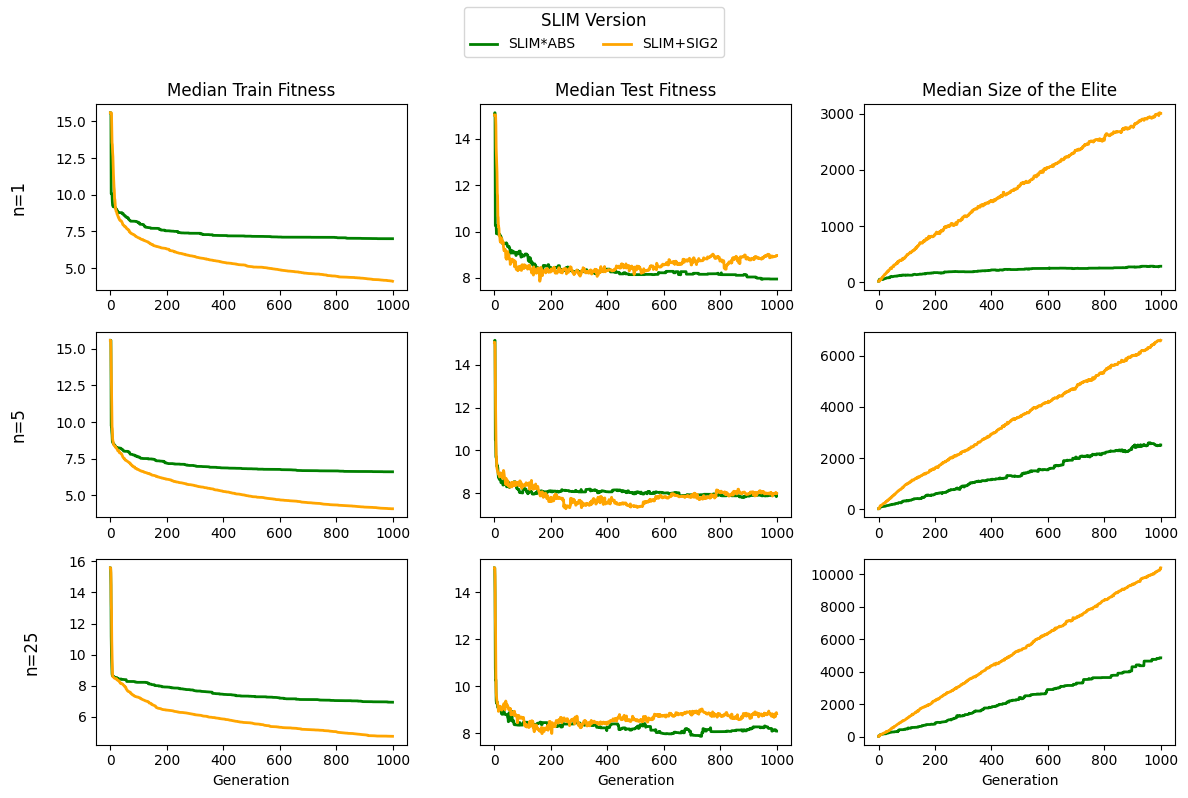

In [38]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/biggest/biggest_1_dif_best_donor_n_xo/concrete_slump_biggest_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_5_dif_best_donor_n_xo/concrete_slump_biggest_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_25_dif_best_donor_n_xo/concrete_slump_biggest_25_dif_best_donor_n_xo.csv'], "b_concrete_slump")

**min_fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_min_concrete_slump.png


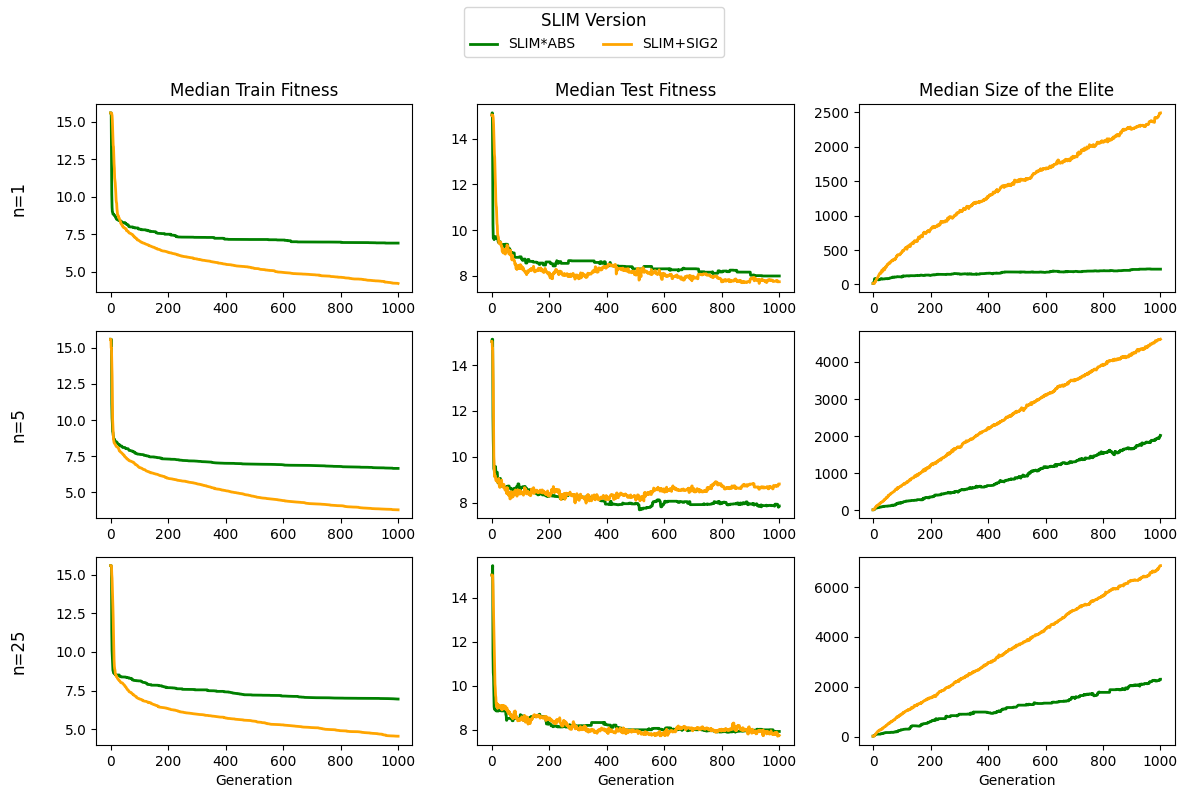

In [39]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/min_fitness/min_fitness_1_dif_best_donor_n_xo/concrete_slump_min_fitness_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_5_dif_best_donor_n_xo/concrete_slump_min_fitness_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_25_dif_best_donor_n_xo/concrete_slump_min_fitness_25_dif_best_donor_n_xo.csv'], "min_concrete_slump")

#### Concrete Strength

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_b_concrete_strength.png


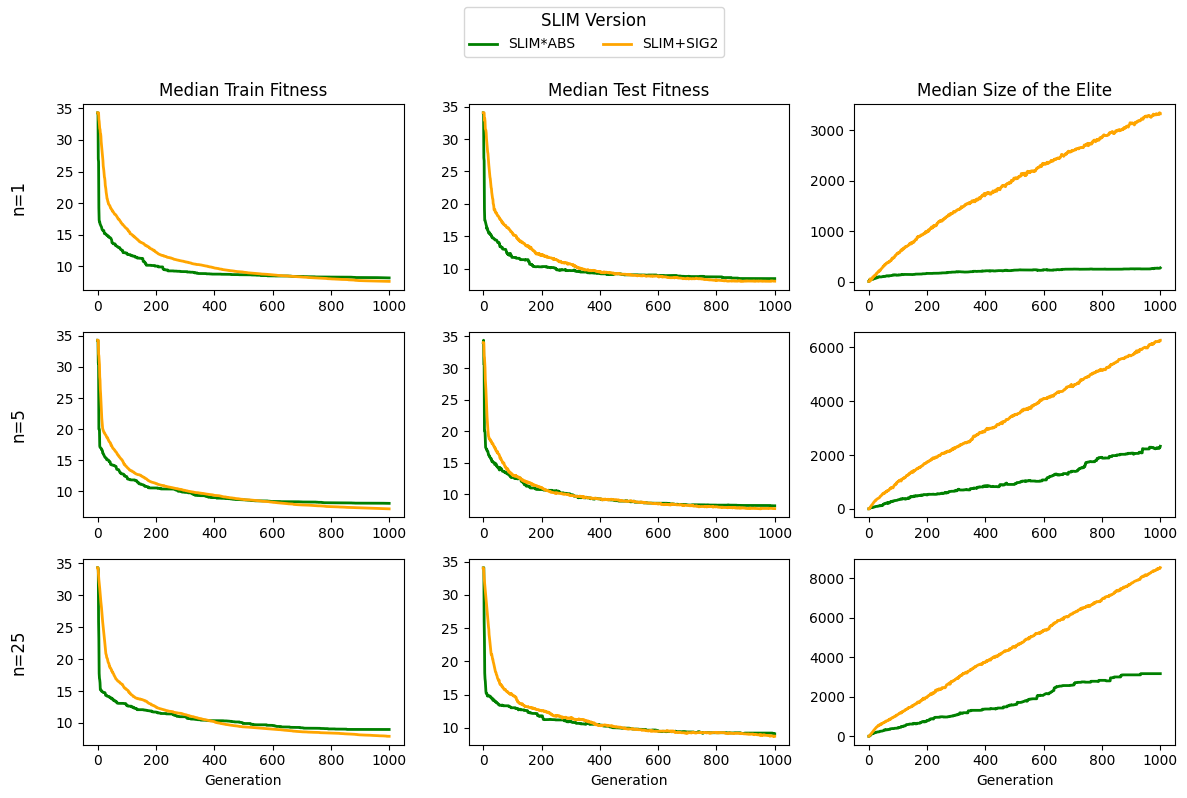

In [40]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/biggest/biggest_1_dif_best_donor_n_xo/concrete_strength_biggest_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_5_dif_best_donor_n_xo/concrete_strength_biggest_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_25_dif_best_donor_n_xo/concrete_strength_biggest_25_dif_best_donor_n_xo.csv'], "b_concrete_strength")

**min_fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_min_concrete_strength.png


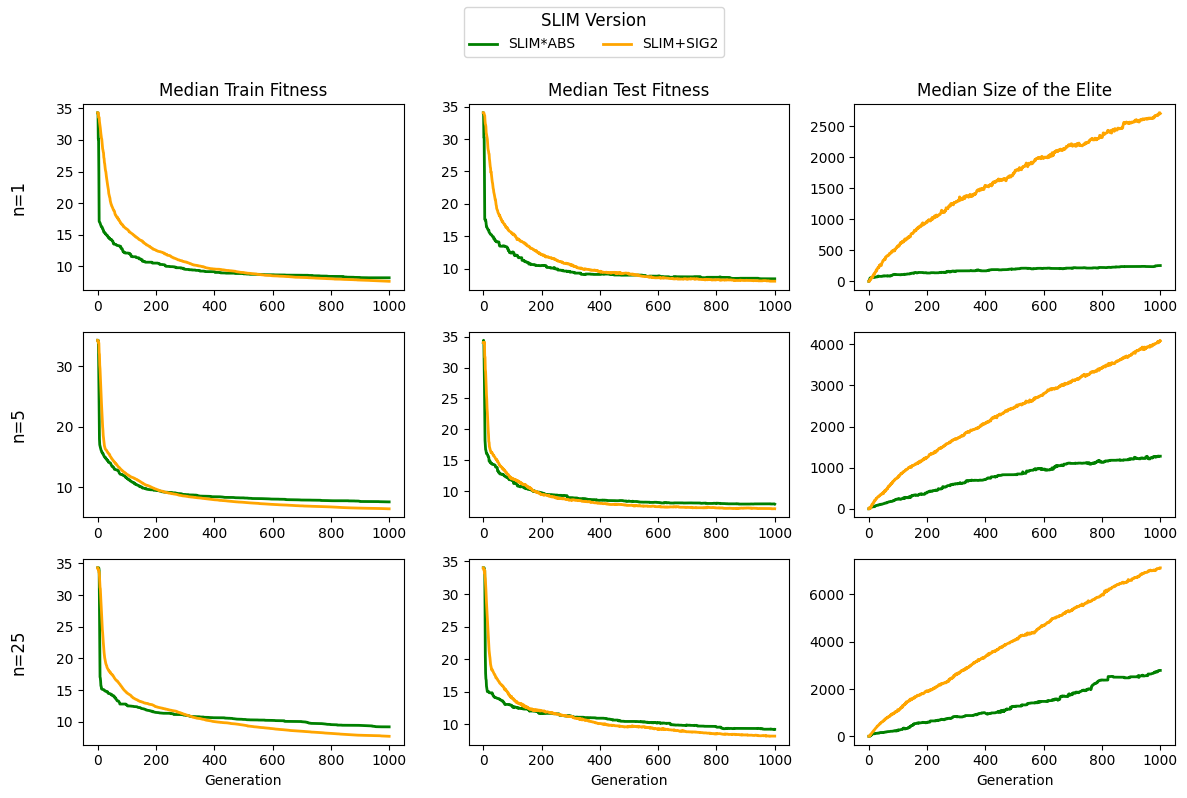

In [41]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/min_fitness/min_fitness_1_dif_best_donor_n_xo/concrete_strength_min_fitness_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_5_dif_best_donor_n_xo/concrete_strength_min_fitness_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_25_dif_best_donor_n_xo/concrete_strength_min_fitness_25_dif_best_donor_n_xo.csv'], "min_concrete_strength")

#### Istanbul

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_b_istanbul.png


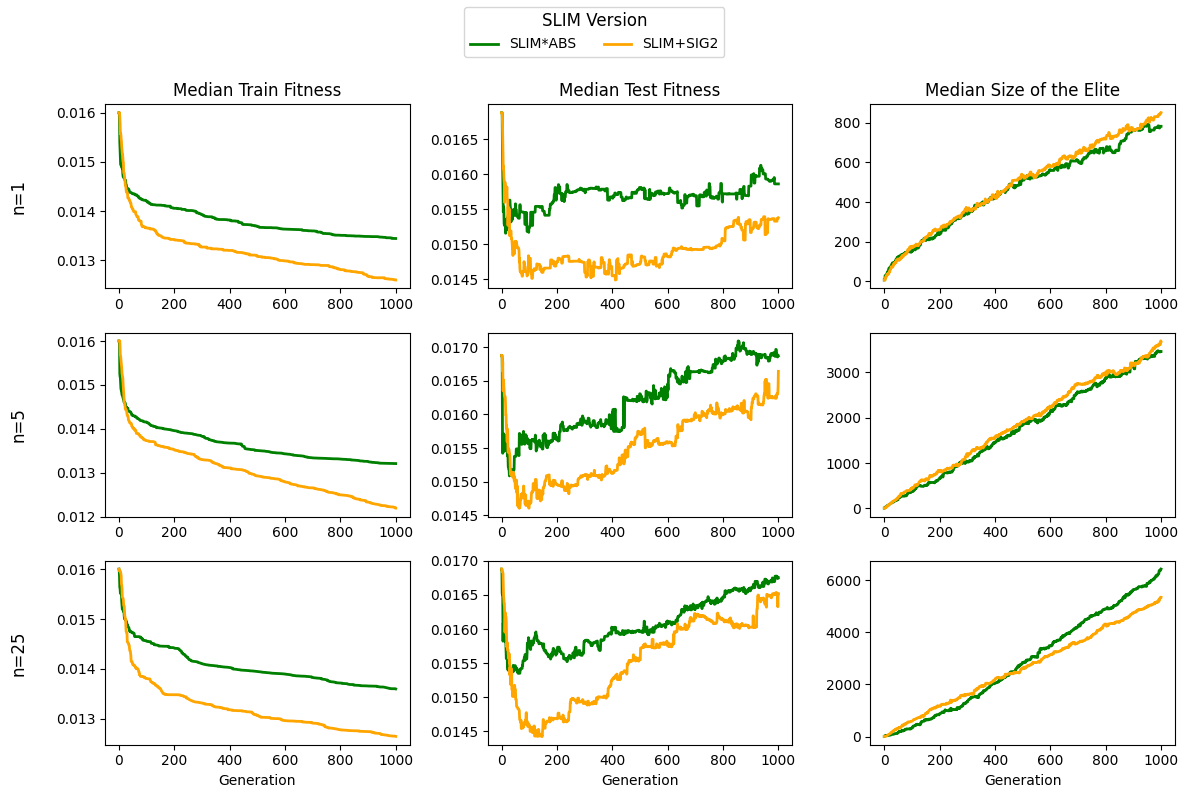

In [42]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/biggest/biggest_1_dif_best_donor_n_xo/istanbul_biggest_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_5_dif_best_donor_n_xo/istanbul_biggest_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_25_dif_best_donor_n_xo/istanbul_biggest_25_dif_best_donor_n_xo.csv'], "b_istanbul")

**min_fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_min_istanbul.png


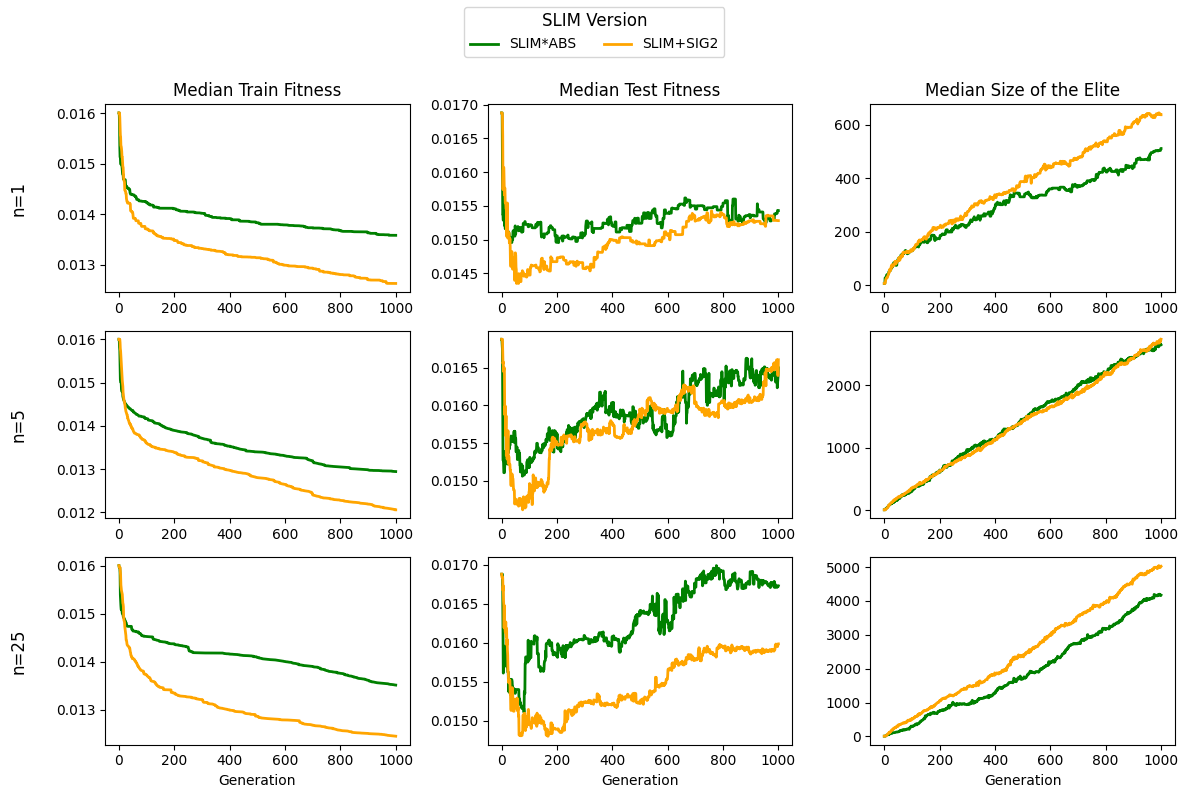

In [43]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/min_fitness/min_fitness_1_dif_best_donor_n_xo/istanbul_min_fitness_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_5_dif_best_donor_n_xo/istanbul_min_fitness_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_25_dif_best_donor_n_xo/istanbul_min_fitness_25_dif_best_donor_n_xo.csv'], "min_istanbul")

#### PPB

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_b_ppb.png


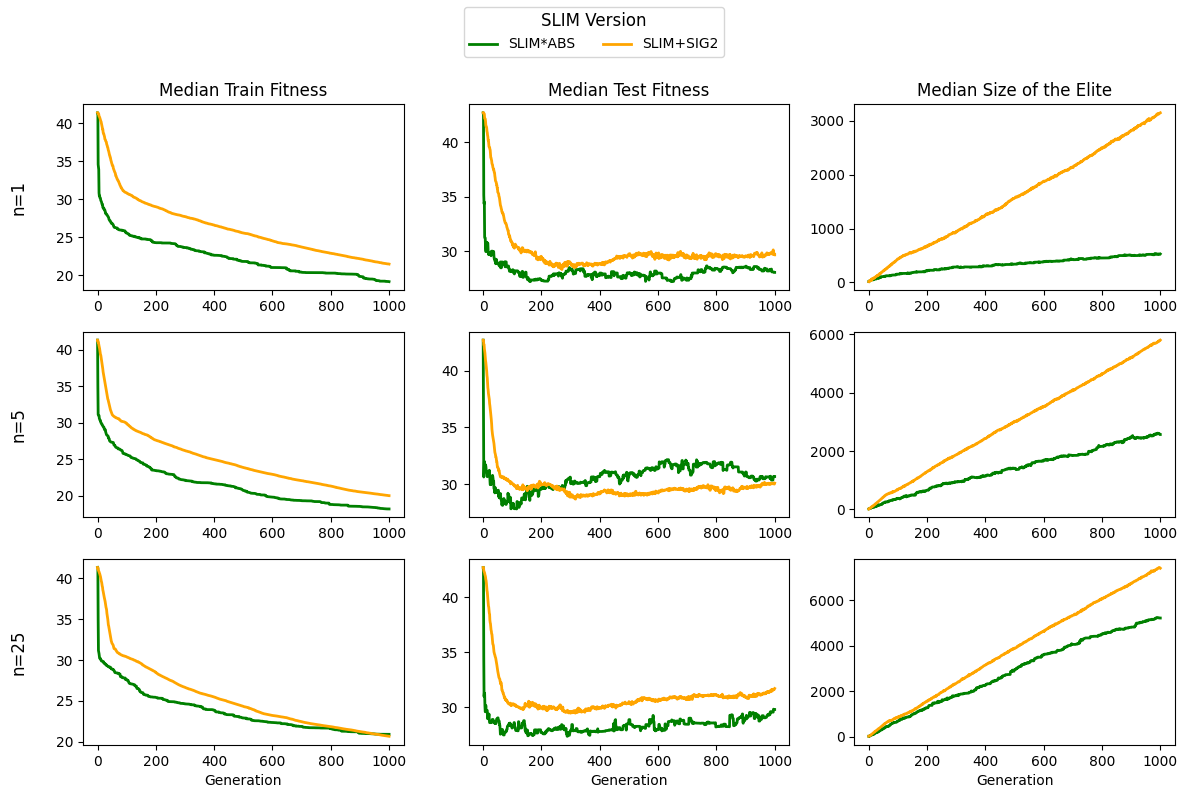

In [44]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/biggest/biggest_1_dif_best_donor_n_xo/ppb_biggest_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_5_dif_best_donor_n_xo/ppb_biggest_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_25_dif_best_donor_n_xo/ppb_biggest_25_dif_best_donor_n_xo.csv'], "b_ppb")

**min fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_min_ppb.png


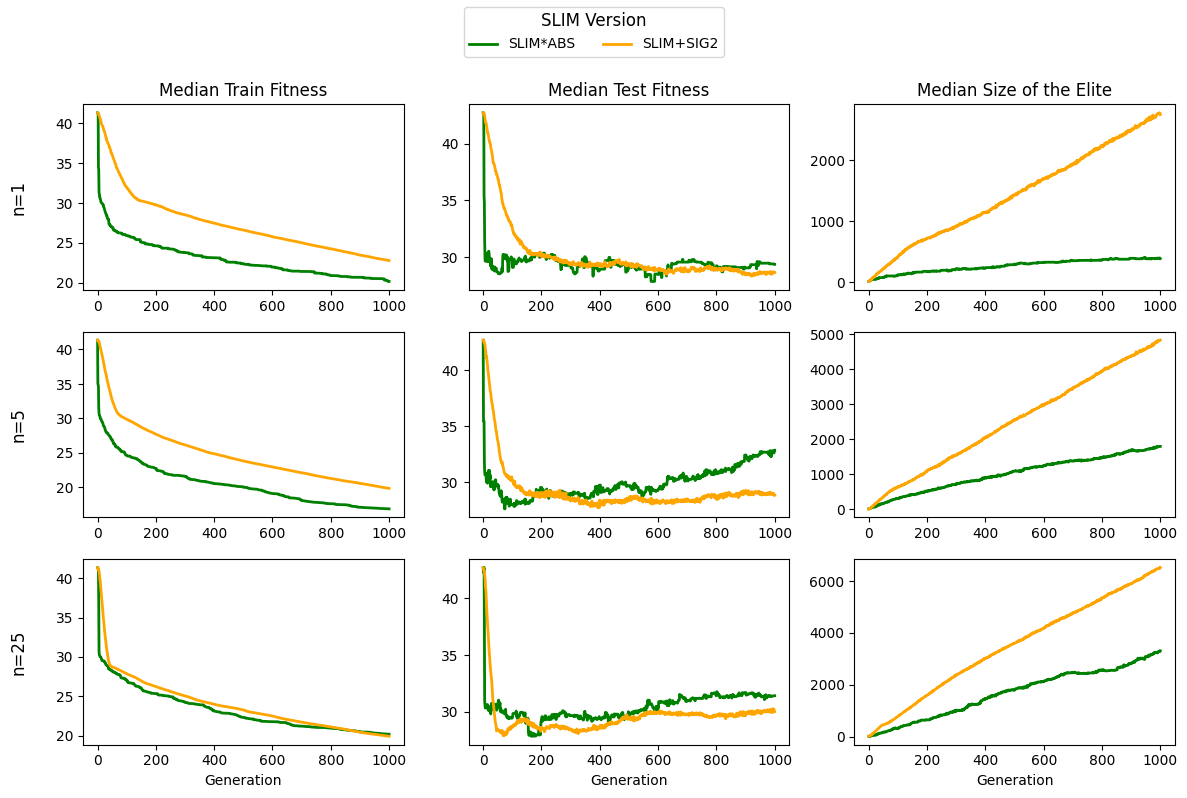

In [45]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/min_fitness/min_fitness_1_dif_best_donor_n_xo/ppb_min_fitness_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_5_dif_best_donor_n_xo/ppb_min_fitness_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_25_dif_best_donor_n_xo/ppb_min_fitness_25_dif_best_donor_n_xo.csv'], "min_ppb")

#### Resid_Build_Sale_Price (RBSP)

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_b_resid_build_sale_price.png


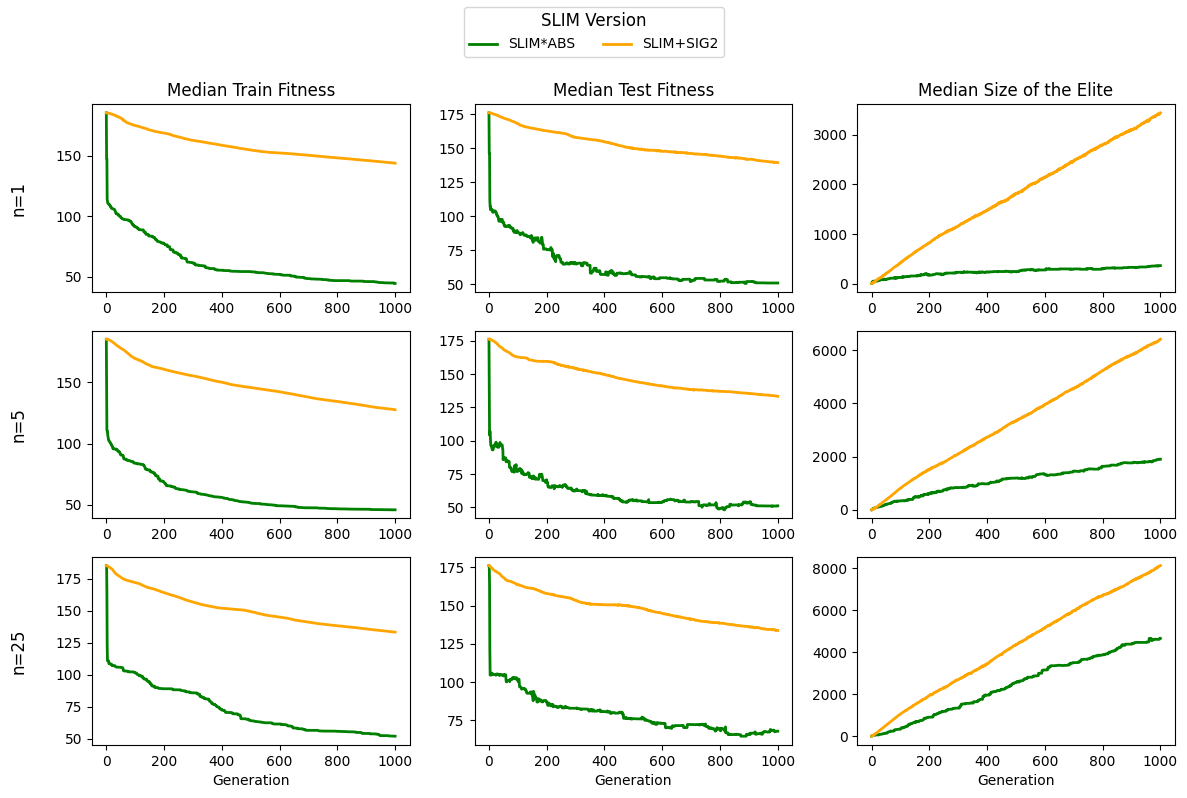

In [46]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/biggest/biggest_1_dif_best_donor_n_xo/resid_build_sale_price_biggest_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_5_dif_best_donor_n_xo/resid_build_sale_price_biggest_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_25_dif_best_donor_n_xo/resid_build_sale_price_biggest_25_dif_best_donor_n_xo.csv'], "b_resid_build_sale_price")

**min fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_min_resid_build_sale_price.png


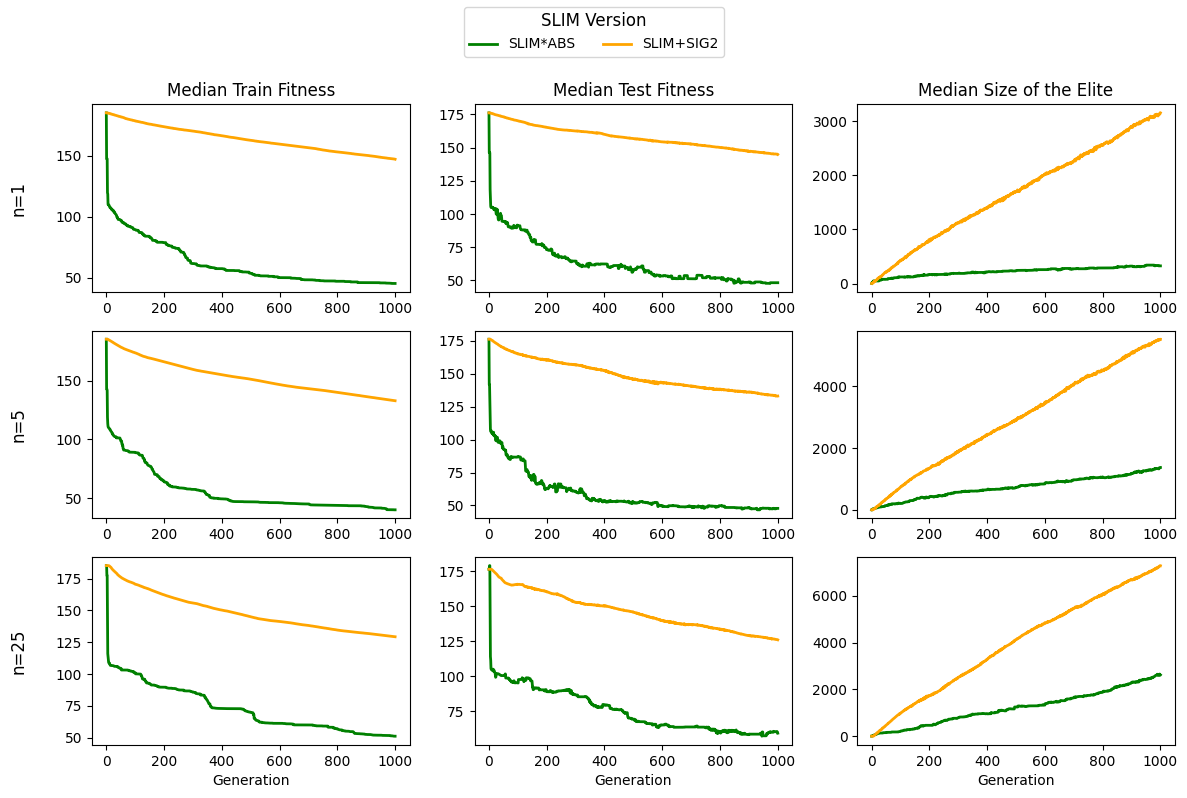

In [47]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/min_fitness/min_fitness_1_dif_best_donor_n_xo/resid_build_sale_price_min_fitness_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_5_dif_best_donor_n_xo/resid_build_sale_price_min_fitness_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_25_dif_best_donor_n_xo/resid_build_sale_price_min_fitness_25_dif_best_donor_n_xo.csv'], "min_resid_build_sale_price")

#### Toxicity

**Biggest**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_b_toxicity.png


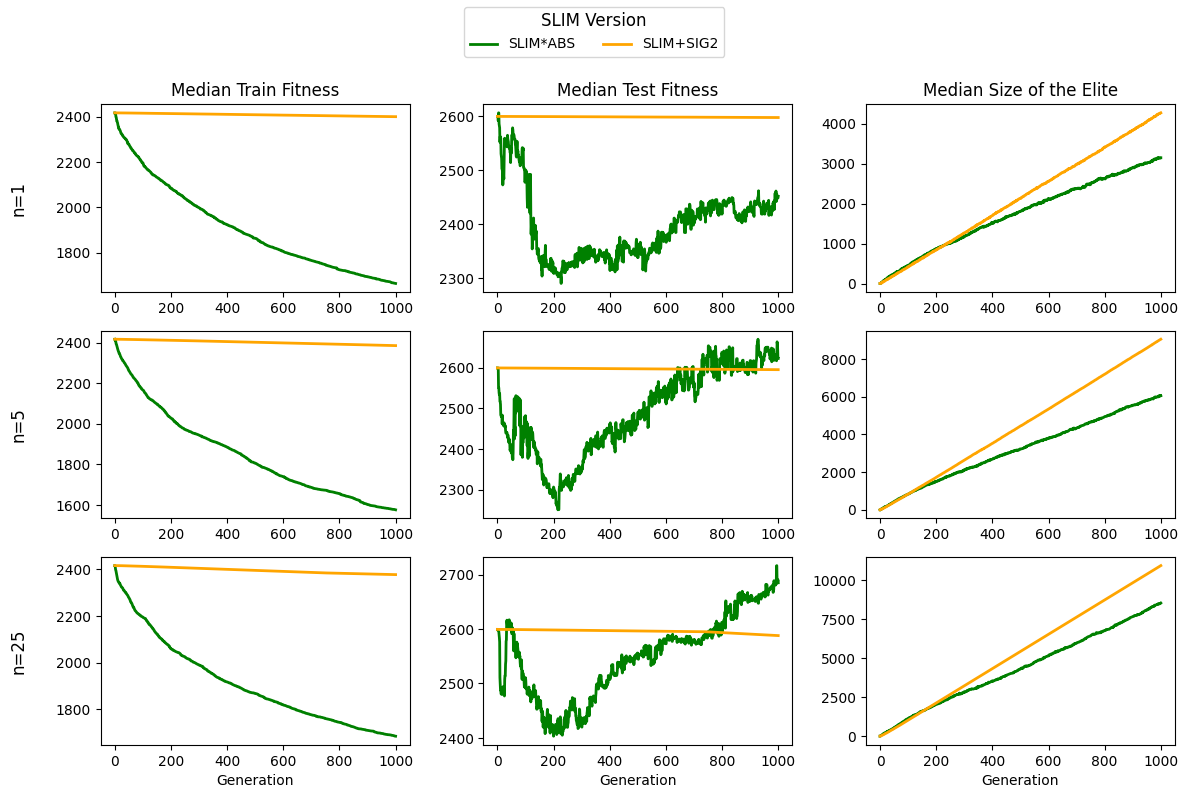

In [48]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/biggest/biggest_1_dif_best_donor_n_xo/toxicity_biggest_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_5_dif_best_donor_n_xo/toxicity_biggest_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/biggest/biggest_25_dif_best_donor_n_xo/toxicity_biggest_25_dif_best_donor_n_xo.csv'], "b_toxicity")

**min fitness**

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/dif_best_donor_n_xo/dif_best_donor_n_xo_min_toxicity.png


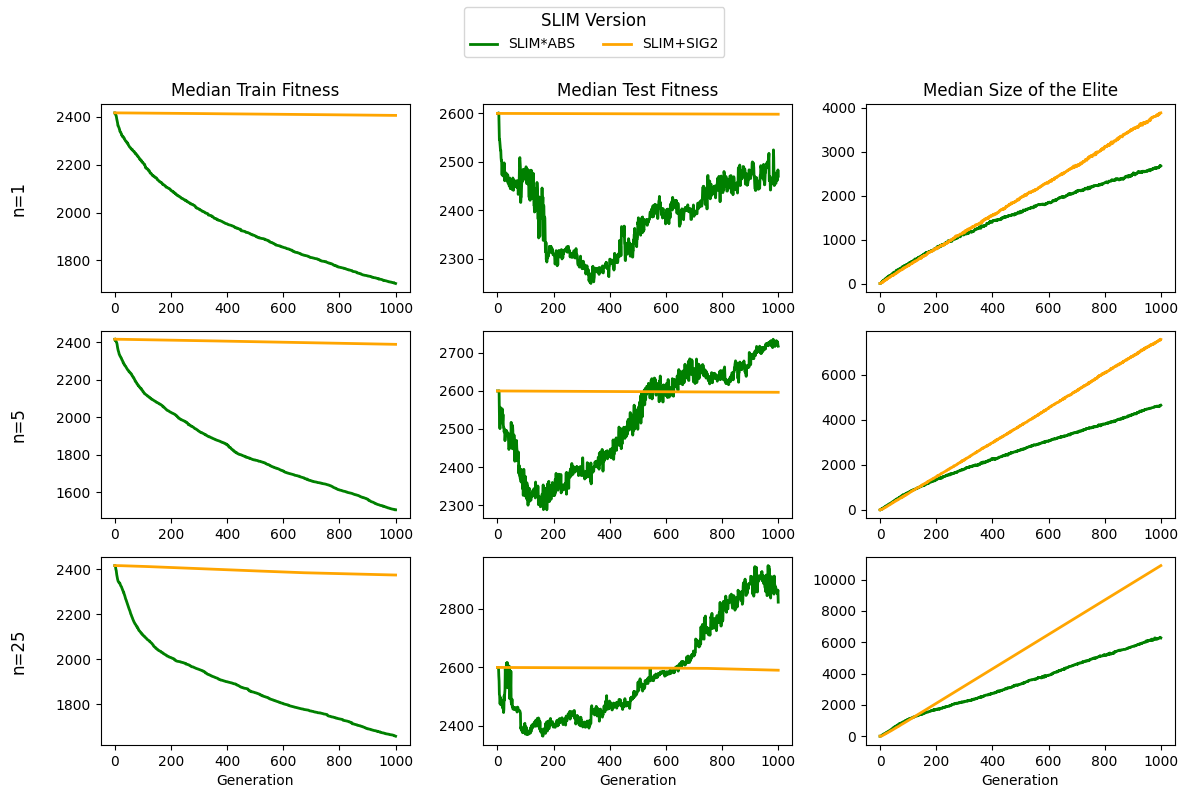

In [49]:
plot_median_metrics_3datasets(["n=1", "n=5", "n=25"], "dif_best_donor_n_xo", ['dif_best_donor_n_xo/min_fitness/min_fitness_1_dif_best_donor_n_xo/toxicity_min_fitness_1_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_5_dif_best_donor_n_xo/toxicity_min_fitness_5_dif_best_donor_n_xo.csv', 'dif_best_donor_n_xo/min_fitness/min_fitness_25_dif_best_donor_n_xo/toxicity_min_fitness_25_dif_best_donor_n_xo.csv'], "min_toxicity")

## Inflate + Deflate

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/i_d/i_d_1.png


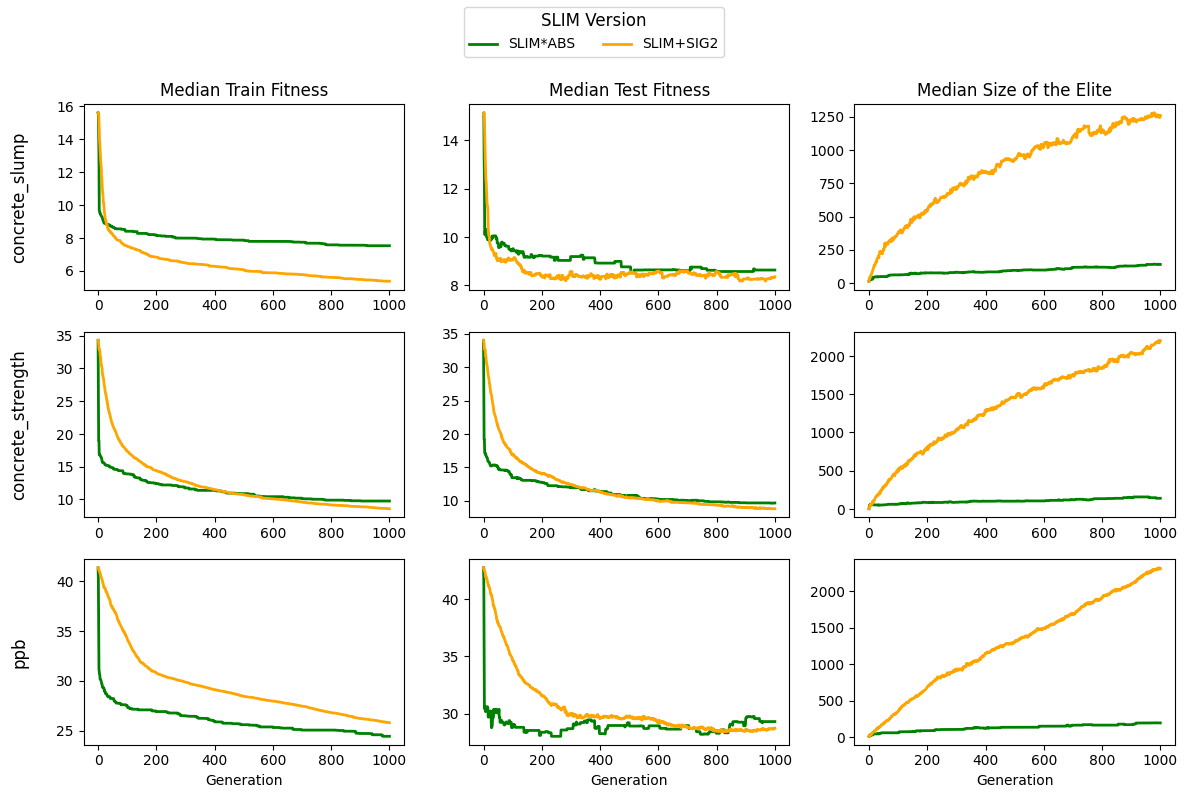

In [6]:
plot_median_metrics_3datasets(["concrete_slump", "concrete_strength", "ppb"], "i_d", ['i_d/concrete_slump_i_d.csv', 'i_d/concrete_strength_i_d.csv', 'i_d/ppb_i_d.csv'],1)

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/i_d/i_d_2.png


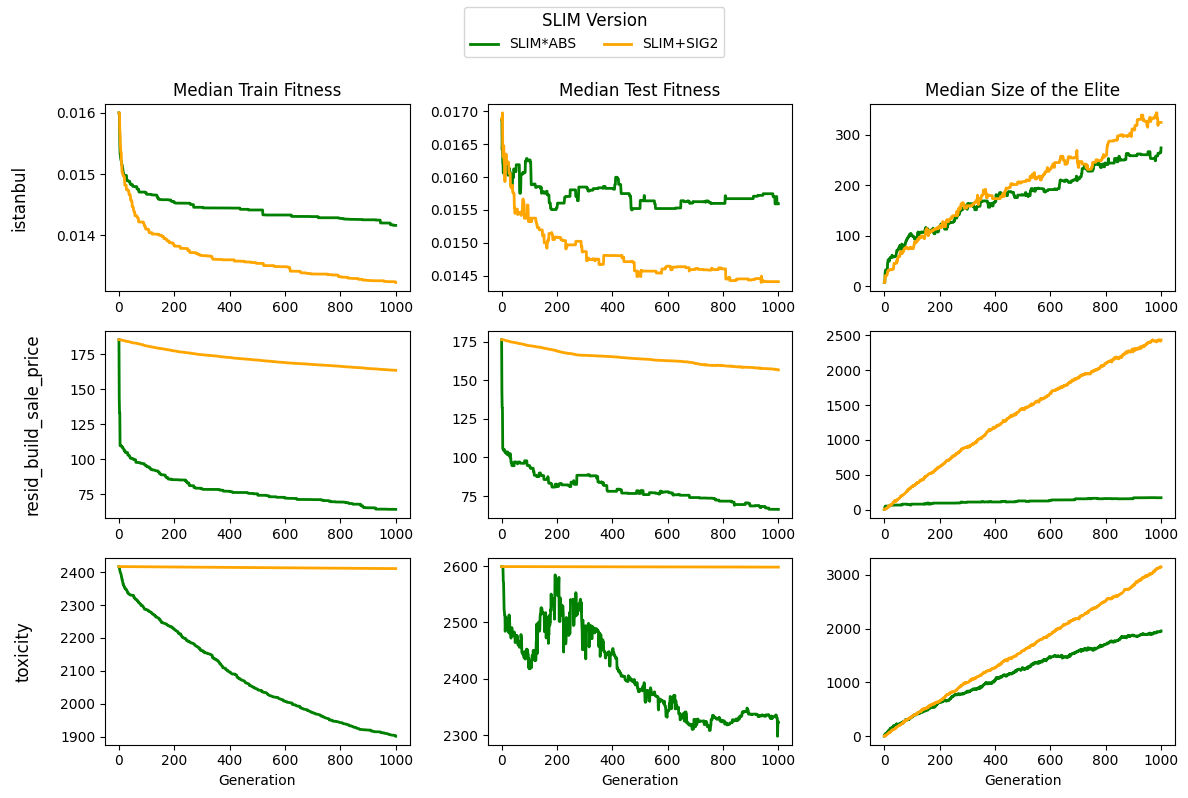

In [7]:
plot_median_metrics_3datasets(["istanbul", "resid_build_sale_price", "toxicity"], "i_d", ['i_d/istanbul_i_d.csv', 'i_d/resid_build_sale_price_i_d.csv', 'i_d/toxicity_i_d.csv'],2)

# Version 2: Direct Comparison

In this version, the goal is to create a plot that directly compares all crossovers (best of each), for each dataset and each slim_version

**STEPS:**
1. Get results for each slim_version.
2. Separate those for each dataset.

For each dataset:
- i_d
- donor_xo
- donor_n_xo (5,25)
- best_donor_xo (select between min and big)
- best_donor_n_xo (select between min, big and 5,25)
- dif_donor_n (bwteen 5 and 25)
- dif_best_donor_n_xo (between 5 and 25, min and big)

### Function

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_xo(dataset_paths, dataset):
    """
    Generate plots for each slim_version, where all crossovers are included together,
    showing train_fitness, test_fitness, and elite_node_count on separate subplots.
    
    Parameters:
        dataset_paths (dict): A dictionary where keys are crossover names (e.g., "Crossover1")
                              and values are file paths to the dataset for that crossover.
    """
    custom_colors = {
        'donor_xo': '#ff7f0e',
        'donor_5_xo': '#ffa04d',
        'donor_25_xo': '#ffd1a3',
        'min_donor_xo': '#2ca02c',
        'big_donor_xo': '#1f77b4',
        'min_donor_5_xo': '#6cc36c',
        'min_donor_25_xo': '#98e198',
        'big_donor_5_xo': '#5a91c8',
        'big_donor_25_xo': '#a3c2e8',
        'dif_donor_5': '#8b4513',
        'dif_donor_25': '#cd853f',
        'dif_min_donor_5': '#e377c2',
        'dif_min_donor_25': '#f7c8e1',
        'dif_big_donor_5': '#7f3f98',
        'dif_big_donor_25': '#b280d6',
    }

    custom_linestyles = {
        'donor_25_xo': '--',
        'big_donor_xo': '--',
        'min_donor_25_xo': '--',
        'big_donor_25_xo': '--',
        'dif_donor_25': '--',
        'dif_min_donor_25': '--',
        'dif_big_donor_25': '--',
    }

    # Loop through each slim_version
    for slim_version in ['SLIM+SIG2', 'SLIM*ABS']:
        # Create a figure with 3 subplots
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))

        # Iterate through each crossover
        for crossover_name, crossover_path in dataset_paths.items():
            crossover_df = pd.read_csv(crossover_path, names=['slim_version', 'run_id', 'dataset', 'id', 'gens',
                                                              'train_fitness', 'time', 'population_node_count', 
                                                              'test_fitness', 'elite_node_count', 'repr', 'log'])
            crossover_df.drop(['run_id', 'dataset', 'id', 'log', 'repr'], axis=1, inplace=True)
            crossover_median = crossover_df.groupby(['slim_version', 'gens']).median().reset_index()
            crossover_data = crossover_median[crossover_median['slim_version'] == slim_version]

            # Plot train fitness vs gens
            axs[0].plot(
                crossover_data['gens'],
                crossover_data['train_fitness'],
                label=f"{crossover_name}",
                color=custom_colors.get(crossover_name, 'black'),
                linestyle=custom_linestyles.get(crossover_name, '-'),
                linewidth=2
            )

            # Plot test fitness vs gens
            axs[1].plot(
                crossover_data['gens'],
                crossover_data['test_fitness'],
                label=f"{crossover_name}",
                color=custom_colors.get(crossover_name, 'black'),
                linestyle=custom_linestyles.get(crossover_name, '-'),
                linewidth=2
            )

            # Plot elite node count vs gens
            axs[2].plot(
                crossover_data['gens'],
                crossover_data['elite_node_count'],
                label=f"{crossover_name}",
                color=custom_colors.get(crossover_name, 'black'),
                linestyle=custom_linestyles.get(crossover_name, '-'),
                linewidth=2
            )

        # Set titles and labels for subplots
        axs[0].set_title(f'Train Fitness Study')
        axs[0].set_xlabel('Generation')
        axs[0].set_ylabel('Train Fitness')

        axs[1].set_title(f'Test Fitness Study')
        axs[1].set_xlabel('Generation')
        axs[1].set_ylabel('Test Fitness')

        axs[2].set_title(f'Elite Node Count Study')
        axs[2].set_xlabel('Generation')
        axs[2].set_ylabel('Elite Node Count')

        # Add legend to the last subplot
        axs[2].legend(loc='best', title='Crossovers', bbox_to_anchor=(1.05, 1))

        # Adjust layout
        plt.tight_layout()

        # Save the plot
        save_dir = f'/Users/sofiapereira/Desktop/Master Thesis/images/{slim_version}'
        os.makedirs(save_dir, exist_ok=True)
        file_name = os.path.join(save_dir, f"{dataset}_all_crossovers.png")
        plt.savefig(file_name, dpi=300)
        print(f"Plot saved at: {file_name}")

        # Show the plot
        plt.show()



### Concrete Slump:

In [28]:
concrete_slump_path = {
    'i_d': 'log/concrete_slump_i_d.csv',
    'donor_xo': 'log/concrete_slump_donor_xo.csv',
    'donor_5_xo': 'log/concrete_slump_5_new_donor_n_xo.csv',
    'donor_25_xo': 'log/concrete_slump_25_new_donor_n_xo.csv', #explodes both individuals, get huge
    'min_donor_xo': 'log/concrete_slump_min_fitness_best_donor_xo.csv',
    'big_donor_xo': 'log/concrete_slump_biggest_best_donor_xo.csv' , #results are worst in both cases
    'min_donor_5_xo': 'log/concrete_slump_min_fitness_5_new_best_donor_n_xo.csv',
    'min_donor_25_xo': 'log/concrete_slump_min_fitness_25_new_best_donor_n_xo.csv',
    'big_donor_5_xo':  'log/concrete_slump_biggest_5_new_best_donor_n_xo.csv',
    'big_donor_25_xo': 'log/concrete_slump_biggest_25_new_best_donor_n_xo.csv', #performance is not 
    'dif_donor_5': 'log/concrete_slump_5_dif_donor_n_xo.csv',
    'dif_donor_25':'log/concrete_slump_25_dif_donor_n_xo.csv', #also explodes individuals, become huge
    'dif_min_donor_5': 'log/concrete_slump_min_fitness_5_dif_best_donor_n_xo.csv',
    'dif_min_donor_25':'log/concrete_slump_min_fitness_25_dif_best_donor_n_xo.csv',
    'dif_big_donor_5':'log/concrete_slump_biggest_5_dif_best_donor_n_xo.csv', 
    'dif_big_donor_25': 'log/concrete_slump_biggest_25_dif_best_donor_n_xo.csv',  #also really explodes
}

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/SLIM+SIG2/concrete_slump_all_crossovers.png


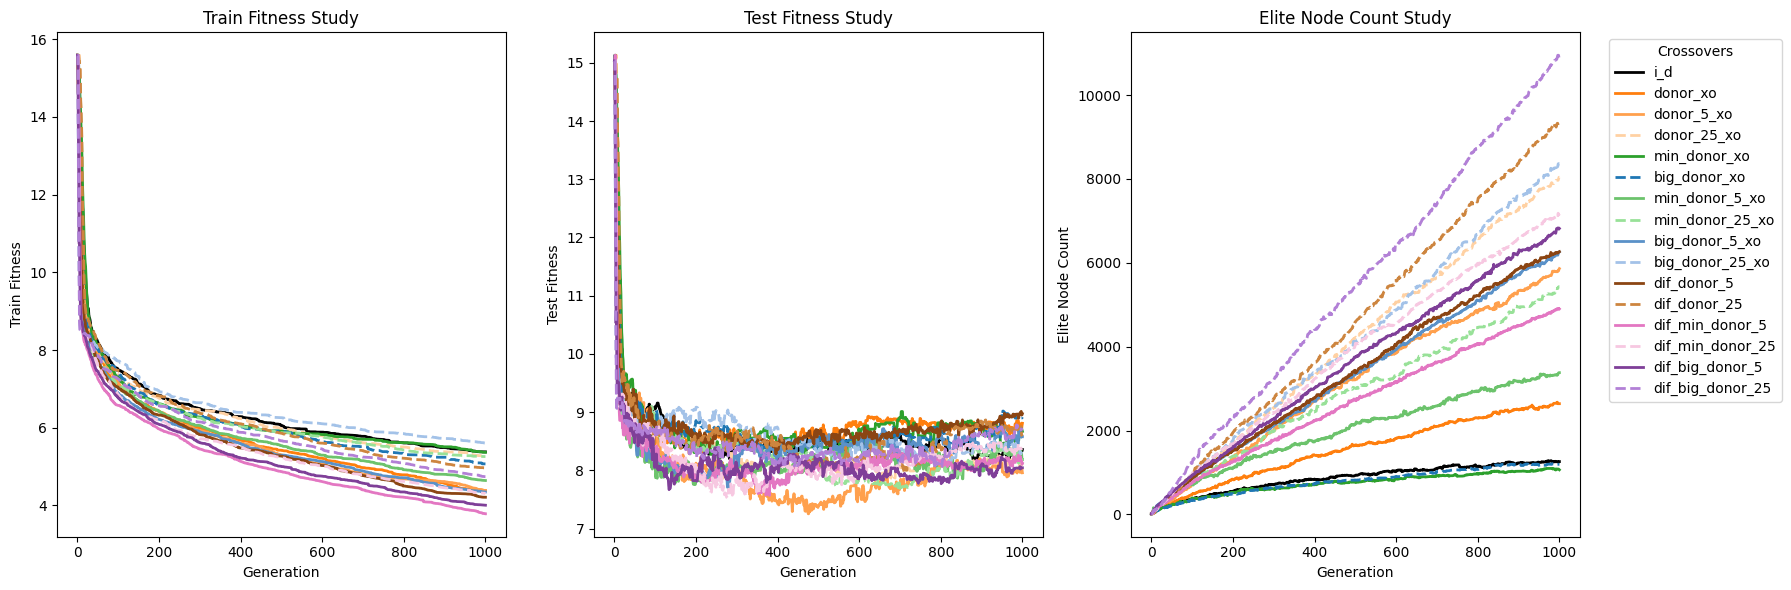

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/SLIM*ABS/concrete_slump_all_crossovers.png


In [30]:
plot_all_xo(concrete_slump_path, "concrete_slump")

### Concrete Strength

In [ ]:
concrete_strength_path = {
    'i_d': 'i_d/concrete_strength_i_d.csv',
    'donor_xo': 'donor_xo/concrete_strength_donor_xo.csv',
    'donor_5_xo': 'donor_n_xo/5_new_donor_n_xo/concrete_strength_5_new_donor_n_xo.csv',
    'donor_25_xo': 'donor_n_xo/25_new_donor_n_xo/concrete_strength_25_new_donor_n_xo.csv',
    'min_donor_xo': 'best_donor_xo/min_fitness_best_donor_xo/concrete_strength_min_fitness_best_donor_xo.csv',
    'big_donor_xo': 'best_donor_xo/biggest_best_donor_xo/concrete_strength_biggest_best_donor_xo.csv' ,
    'min_donor_5_xo': 'best_donor_n_xo/min_fitness/min_fitness_5_new_best_donor_n_xo/concrete_strength_min_fitness_5_new_best_donor_n_xo.csv',
    'min_donor_25_xo': 'best_donor_n_xo/min_fitness/min_fitness_25_new_best_donor_n_xo/concrete_strength_min_fitness_25_new_best_donor_n_xo.csv',
    'big_donor_5_xo':  'best_donor_n_xo/biggest/biggest_5_new_best_donor_n_xo/concrete_strength_biggest_5_new_best_donor_n_xo.csv',
    'big_donor_25_xo': 'best_donor_n_xo/biggest/biggest_25_new_best_donor_n_xo/concrete_strength_biggest_25_new_best_donor_n_xo.csv',
    'dif_donor_5': 'dif_donor_n_xo/5_dif_donor_n_xo/concrete_strength_5_dif_donor_n_xo.csv',
    'dif_donor_25':'dif_donor_n_xo/25_dif_donor_n_xo/concrete_strength_25_dif_donor_n_xo.csv',
    'dif_min_donor_5': 'dif_best_donor_n_xo/min_fitness/min_fitness_5_dif_best_donor_n_xo/concrete_strength_min_fitness_5_dif_best_donor_n_xo.csv',
    'dif_min_donor_25':'dif_best_donor_n_xo/min_fitness/min_fitness_25_dif_best_donor_n_xo/concrete_strength_min_fitness_25_dif_best_donor_n_xo.csv',
    'dif_big_donor_5':'dif_best_donor_n_xo/biggest/biggest_5_dif_best_donor_n_xo/concrete_strength_biggest_5_dif_best_donor_n_xo.csv', 
    'dif_big_donor_25': 'dif_best_donor_n_xo/biggest/biggest_25_dif_best_donor_n_xo/concrete_strength_biggest_25_dif_best_donor_n_xo.csv', 
}

In [ ]:
plot_all_xo(concrete_strength_path, "concrete_strength")

### PPB

In [33]:
ppb_path = {
    'i_d': 'log/ppb_i_d.csv',
    'donor_xo': 'log/ppb_donor_xo.csv',
    'donor_5_xo': 'log/ppb_5_new_donor_n_xo.csv',
    'donor_25_xo': 'log/ppb_25_new_donor_n_xo.csv',
    'min_donor_xo': 'log/ppb_min_fitness_best_donor_xo.csv',
    'big_donor_xo': 'log/ppb_biggest_best_donor_xo.csv' ,
    'min_donor_5_xo': 'log/ppb_min_fitness_5_new_best_donor_n_xo.csv',
    'min_donor_25_xo': 'log/ppb_min_fitness_25_new_best_donor_n_xo.csv',
    'big_donor_5_xo':  'log/ppb_biggest_5_new_best_donor_n_xo.csv',
    'big_donor_25_xo': 'log/ppb_biggest_25_new_best_donor_n_xo.csv',
    'dif_donor_5': 'log/ppb_5_dif_donor_n_xo.csv',
    'dif_donor_25':'log/ppb_25_dif_donor_n_xo.csv',
    'dif_min_donor_5': 'log/ppb_min_fitness_5_dif_best_donor_n_xo.csv',
    'dif_min_donor_25':'log/ppb_min_fitness_25_dif_best_donor_n_xo.csv',
    'dif_big_donor_5':'log/ppb_biggest_5_dif_best_donor_n_xo.csv', 
    'dif_big_donor_25': 'log/ppb_biggest_25_dif_best_donor_n_xo.csv', 
}

FileNotFoundError: [Errno 2] No such file or directory: 'log/ppb_min_fitness_best_donor_xo.csv'

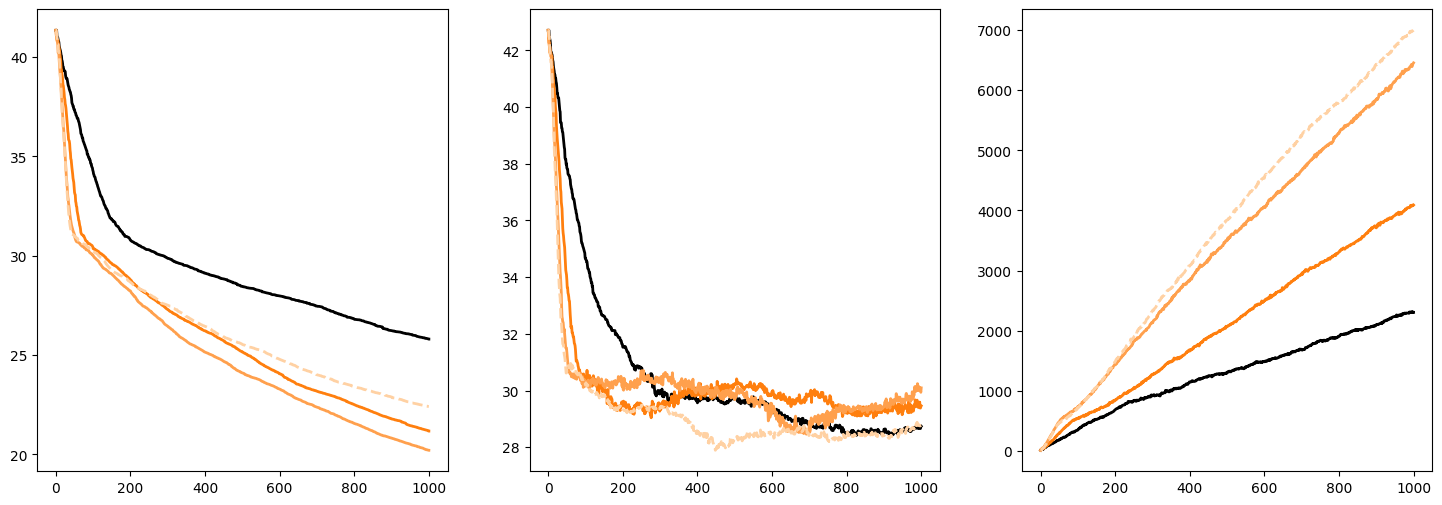

In [34]:
plot_all_xo(ppb_path, "ppb")

### Istanbul:

In [ ]:
istanbul_path ={
    'i_d': 'i_d/istanbul_i_d.csv',
    'donor_xo': 'donor_xo/istanbul_donor_xo.csv',
    'donor_5_xo': 'donor_n_xo/5_new_donor_n_xo/istanbul_5_new_donor_n_xo.csv',
    'donor_25_xo': 'donor_n_xo/25_new_donor_n_xo/istanbul_25_new_donor_n_xo.csv',
    'min_donor_xo': 'best_donor_xo/min_fitness_best_donor_xo/istanbul_min_fitness_best_donor_xo.csv',
    'big_donor_xo': 'best_donor_xo/biggest_best_donor_xo/istanbul_biggest_best_donor_xo.csv' ,
    'min_donor_5_xo': 'best_donor_n_xo/min_fitness/min_fitness_5_new_best_donor_n_xo/istanbul_min_fitness_5_new_best_donor_n_xo.csv',
    'min_donor_25_xo': 'best_donor_n_xo/min_fitness/min_fitness_25_new_best_donor_n_xo/istanbul_min_fitness_25_new_best_donor_n_xo.csv',
    'big_donor_5_xo':  'best_donor_n_xo/biggest/biggest_5_new_best_donor_n_xo/istanbul_biggest_5_new_best_donor_n_xo.csv',
    'big_donor_25_xo': 'best_donor_n_xo/biggest/biggest_25_new_best_donor_n_xo/istanbul_biggest_25_new_best_donor_n_xo.csv',
    'dif_donor_5': 'dif_donor_n_xo/5_dif_donor_n_xo/istanbul_5_dif_donor_n_xo.csv',
    'dif_donor_25':'dif_donor_n_xo/25_dif_donor_n_xo/istanbul_25_dif_donor_n_xo.csv',
    'dif_min_donor_5': 'dif_best_donor_n_xo/min_fitness/min_fitness_5_dif_best_donor_n_xo/istanbul_min_fitness_5_dif_best_donor_n_xo.csv',
    'dif_min_donor_25':'dif_best_donor_n_xo/min_fitness/min_fitness_25_dif_best_donor_n_xo/istanbul_min_fitness_25_dif_best_donor_n_xo.csv',
    'dif_big_donor_5':'dif_best_donor_n_xo/biggest/biggest_5_dif_best_donor_n_xo/istanbul_biggest_5_dif_best_donor_n_xo.csv', 
    'dif_big_donor_25': 'dif_best_donor_n_xo/biggest/biggest_25_dif_best_donor_n_xo/istanbul_biggest_25_dif_best_donor_n_xo.csv', 
}

In [ ]:
plot_all_xo(istanbul_path, "istanbul")

### RBSP

In [ ]:
resid_build_sale_price_path = {
    'i_d': 'i_d/resid_build_sale_price_i_d.csv',
    'donor_xo': 'donor_xo/resid_build_sale_price_donor_xo.csv',
    'donor_5_xo': 'donor_n_xo/5_new_donor_n_xo/resid_build_sale_price_5_new_donor_n_xo.csv',
    'donor_25_xo': 'donor_n_xo/25_new_donor_n_xo/resid_build_sale_price_25_new_donor_n_xo.csv',
    'min_donor_xo': 'best_donor_xo/min_fitness_best_donor_xo/resid_build_sale_price_min_fitness_best_donor_xo.csv',
    'big_donor_xo': 'best_donor_xo/biggest_best_donor_xo/resid_build_sale_price_biggest_best_donor_xo.csv' ,
    'min_donor_5_xo': 'best_donor_n_xo/min_fitness/min_fitness_5_new_best_donor_n_xo/resid_build_sale_price_min_fitness_5_new_best_donor_n_xo.csv',
    'min_donor_25_xo': 'best_donor_n_xo/min_fitness/min_fitness_25_new_best_donor_n_xo/resid_build_sale_price_min_fitness_25_new_best_donor_n_xo.csv',
    'big_donor_5_xo':  'best_donor_n_xo/biggest/biggest_5_new_best_donor_n_xo/resid_build_sale_price_biggest_5_new_best_donor_n_xo.csv',
    'big_donor_25_xo': 'best_donor_n_xo/biggest/biggest_25_new_best_donor_n_xo/resid_build_sale_price_biggest_25_new_best_donor_n_xo.csv',
    'dif_donor_5': 'dif_donor_n_xo/5_dif_donor_n_xo/resid_build_sale_price_5_dif_donor_n_xo.csv',
    'dif_donor_25':'dif_donor_n_xo/25_dif_donor_n_xo/resid_build_sale_price_25_dif_donor_n_xo.csv',
    'dif_min_donor_5': 'dif_best_donor_n_xo/min_fitness/min_fitness_5_dif_best_donor_n_xo/resid_build_sale_price_min_fitness_5_dif_best_donor_n_xo.csv',
    'dif_min_donor_25':'dif_best_donor_n_xo/min_fitness/min_fitness_25_dif_best_donor_n_xo/resid_build_sale_price_min_fitness_25_dif_best_donor_n_xo.csv',
    'dif_big_donor_5':'dif_best_donor_n_xo/biggest/biggest_5_dif_best_donor_n_xo/resid_build_sale_price_biggest_5_dif_best_donor_n_xo.csv', 
    'dif_big_donor_25': 'dif_best_donor_n_xo/biggest/biggest_25_dif_best_donor_n_xo/resid_build_sale_price_biggest_25_dif_best_donor_n_xo.csv', 
}

In [ ]:
plot_all_xo(resid_build_sale_price_path, "rbsp")

### Toxicity

In [31]:
toxicity_path = {
    'i_d': 'log/toxicity_i_d.csv',
    'donor_xo': 'log/toxicity_donor_xo.csv',
    'donor_5_xo': 'log/toxicity_5_new_donor_n_xo.csv',
    'donor_25_xo': 'log/toxicity_25_new_donor_n_xo.csv',
    'min_donor_xo': 'log/toxicity_min_fitness_best_donor_xo.csv',
    'big_donor_xo': 'log/toxicity_biggest_best_donor_xo.csv' ,
    'min_donor_5_xo': 'log/toxicity_min_fitness_5_new_best_donor_n_xo.csv',
    'min_donor_25_xo': 'log/toxicity_min_fitness_25_new_best_donor_n_xo.csv',
    'big_donor_5_xo':  'log/toxicity_biggest_5_new_best_donor_n_xo.csv',
    'big_donor_25_xo': 'log/toxicity_biggest_25_new_best_donor_n_xo.csv',
    'dif_donor_5': 'log/toxicity_5_dif_donor_n_xo.csv',
    'dif_donor_25':'log/toxicity_25_dif_donor_n_xo.csv',
    'dif_min_donor_5': 'log/toxicity_min_fitness_5_dif_best_donor_n_xo.csv',
    'dif_min_donor_25':'log/toxicity_min_fitness_25_dif_best_donor_n_xo.csv',
    'dif_big_donor_5':'log/toxicity_biggest_5_dif_best_donor_n_xo.csv', 
    'dif_big_donor_25': 'log/toxicity_biggest_25_dif_best_donor_n_xo.csv', 
}

Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/SLIM+SIG2/toxicity_all_crossovers.png


Plot saved at: /Users/sofiapereira/Desktop/Master Thesis/images/SLIM*ABS/toxicity_all_crossovers.png


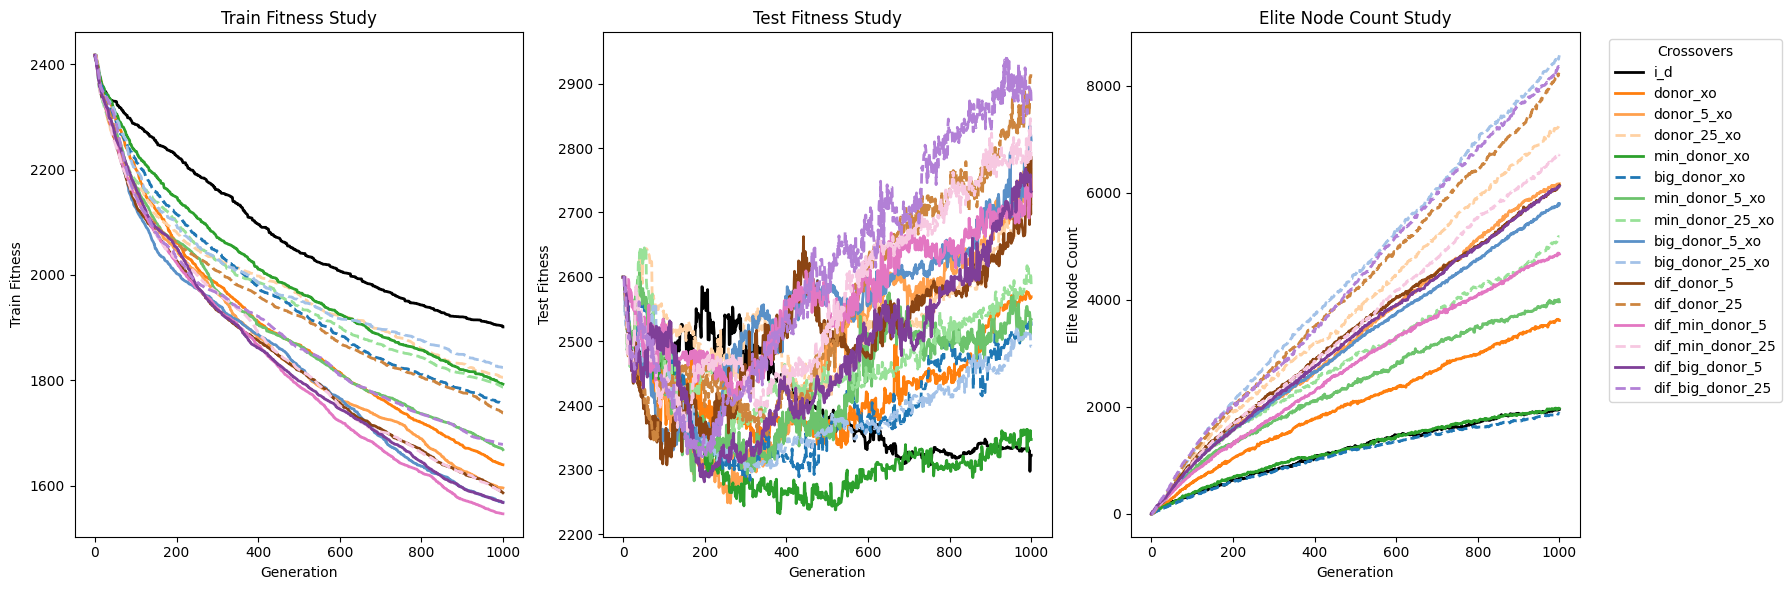

In [32]:
plot_all_xo(toxicity_path, "toxicity")